# Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading and Exploring Data

In [4]:
csv_data = pd.read_csv('census06.csv')

In [5]:
# showing the first 5 columns 

csv_data.head()


House Number      Street First Name Surname Age  \
0             1  Scott Dale    Maureen     Cox  50   
1             1  Scott Dale       Rhys   Brown  52   
2             2  Scott Dale   Lorraine   Allen  69   
3             2  Scott Dale      Lewis   Allen  72   
4             3  Scott Dale      Molly   Patel  36   

  Relationship to Head of House Marital Status  Gender  \
0                          Head         Single  Female   
1                       Partner         Single    Male   
2                          Head        Married  Female   
3                       Husband        Married    Male   
4                          Head        Married  Female   

                    Occupation Infirmity   Religion  
0  Engineer, building services      None   Catholic  
1             Engineer, mining      None   Catholic  
2                   Unemployed      None  Methodist  
3  Retired Associate Professor      None  Methodist  
4               Engineer, land      None       None

In [6]:
# showing the last 5 columns 

csv_data.tail()


House Number            Street First Name Surname Age  \
8324             1     Walker Palace     Adrian   Mason  56   
8325             1  Poole Stronghold       Beth   Evans  43   
8326             1  Poole Stronghold     Trevor   Evans  43   
8327             1  Poole Stronghold     Pamela   Evans   0   
8328             1  Poole Stronghold      Carol  Thomas  24   

     Relationship to Head of House Marital Status  Gender  \
8324                        Lodger         Single    Male   
8325                          Head        Married  Female   
8326                       Husband        Married    Male   
8327                      Daughter            NaN  Female   
8328                       Sibling         Single  Female   

                                            Occupation Infirmity   Religion  
8324                                        Unemployed      None     Muslim  
8325                                     Buyer, retail      None  Christian  
8326                                   Patent examiner      None  Christian  
8327                                             Child      None        NaN  
8328  Administrator, charities/voluntary organisations      None  Christian

In [7]:
# rename the columns to remove empty spaces
# showing the first 5 columns 

csv_data.columns = csv_data.columns.str.replace(' ', '_')

In [8]:
csv_data.columns

Index(['House_Number', 'Street', 'First_Name', 'Surname', 'Age',
       'Relationship_to_Head_of_House', 'Marital_Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [9]:
# checking on samples to observe the data
# showing the first 5 columns 

csv_data.sample(10)

House_Number           Street First_Name   Surname Age  \
8019             8     Kestrel Flat     Andrea     Smith  39   
667             19     Wessex Drive  Kimberley    Clarke  53   
2876            46        Dale Road     Lesley    Cooper  50   
653             16     Wessex Drive   Kayleigh     Patel  67   
3678            48    Bishop Avenue       Luke  Williams  26   
3340            26  Bronze Crescent       Ross     James  17   
7119             5      Doyle Drive     Callum    Fisher  54   
262              3        Gold Road   Kayleigh    Foster  44   
826             60     Wessex Drive        Ben   Watkins   8   
2325            10    Davies Plains        Lee    Harvey  56   

     Relationship_to_Head_of_House Marital_Status  Gender  \
8019                        Lodger       Divorced  Female   
667                         Lodger         Single  Female   
2876                          Head       Divorced  Female   
653                           Head        Widowed  Female   
3678                           Son         Single    Male   
3340                           Son            NaN    Male   
7119                       Husband        Married    Male   
262                           Head         Single  Female   
826                            Son            NaN    Male   
2325                        Cousin         Single    Male   

                        Occupation Infirmity   Religion  
8019  Conservation officer, nature      None  Christian  
667                     Unemployed      None  Christian  
2876           Biomedical engineer      None       None  
653                     Unemployed      None       None  
3678                 Site engineer      None  Christian  
3340                       Student      None        NaN  
7119           Engineer, materials      None       None  
262                     Ergonomist      None   Catholic  
826                        Student      None        NaN  
2325             Financial manager      None       None

In [10]:
#check for duplicates in my dataset
csv_data.duplicated().sum()

0

In [11]:
# checkinh how many colums and rows in our data

# showing the first 5 columns 

csv_data.shape

(8329, 11)

- Result here showed that there 8329 rows and 11 columns in my data

In [12]:
# To check the data types in my data, i used .info

# showing the first 5 columns 

csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House_Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First_Name                     8329 non-null   object
 3   Surname                        8329 non-null   object
 4   Age                            8329 non-null   object
 5   Relationship_to_Head_of_House  8329 non-null   object
 6   Marital_Status                 6273 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      8329 non-null   object
 10  Religion                       6224 non-null   object
dtypes: int64(1), object(10)
memory usage: 715.9+ KB


- All the data types are object with the exception of House_Number
- Looking at this information also showed that Marital status and Religion columns have missing values as they are not upto 8329
- Our age columns comes out as an object which implies that it is a string. This is a pointer to one of the columns we will need to clean up

In [13]:
# I have to go further to check for missing values.

# showing the first 5 columns 

csv_data.isnull().sum()

House_Number                        0
Street                              0
First_Name                          0
Surname                             0
Age                                 0
Relationship_to_Head_of_House       0
Marital_Status                   2056
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2105
dtype: int64

- This shows that we have a total of 2059 and 2109 missing values in the columns of Marital Status and Religion respectively.
- We should also note that missing values are not the same thing as blank spaces. We will also need to look at that as we progress

In [14]:
# To get some descpritive statistics of the data, I have to call describe method.

# showing the first 5 columns 

csv_data.describe(include = 'all')

House_Number        Street First_Name Surname   Age  \
count    8329.000000          8329       8329    8329  8329   
unique           NaN           105        365     654   127   
top              NaN  Wessex Drive   Geoffrey   Smith    40   
freq             NaN           793         36     262   168   
mean       29.340737           NaN        NaN     NaN   NaN   
std        35.744848           NaN        NaN     NaN   NaN   
min         1.000000           NaN        NaN     NaN   NaN   
25%         8.000000           NaN        NaN     NaN   NaN   
50%        19.000000           NaN        NaN     NaN   NaN   
75%        35.000000           NaN        NaN     NaN   NaN   
max       207.000000           NaN        NaN     NaN   NaN   

       Relationship_to_Head_of_House Marital_Status  Gender Occupation  \
count                           8329           6273    8329       8329   
unique                            23              5       2       1058   
top                             Head         Single  Female    Student   
freq                            2824           2941    4302       1669   
mean                             NaN            NaN     NaN        NaN   
std                              NaN            NaN     NaN        NaN   
min                              NaN            NaN     NaN        NaN   
25%                              NaN            NaN     NaN        NaN   
50%                              NaN            NaN     NaN        NaN   
75%                              NaN            NaN     NaN        NaN   
max                              NaN            NaN     NaN        NaN   

       Infirmity Religion  
count       8329     6224  
unique         8       10  
top         None     None  
freq        8261     2800  
mean         NaN      NaN  
std          NaN      NaN  
min          NaN      NaN  
25%          NaN      NaN  
50%          NaN      NaN  
75%          NaN      NaN  
max          NaN      NaN

- Describe method usually works with numeric values hence the reason for most of the the NAN in the data. I will need to redo this again after data clean up to be able to get more statistical information from here

## Data Cleaning

- The goal here to clean and handle the problems with features in the data

#### Age Columns

Here, I will start by finding the row(s) that caused the columns to turn to string

In [15]:
# I will start by printing out the problematic rows

# showing the first 5 columns 

csv_data['Age'].unique()


array(['50', '52', '69', '72', '36', '42', '38', '7', '29', '32', '62',
       '80', '56', '55', '25', '17', '63', '23', '22', '39', '41', '2',
       '1', '67', '65', '28', '27', '5', '4', '3', '20', '19', '49',
       '83.71794888354226', '14.0', '66', '82', '83', '44', '15', '21',
       '46', '45', '43', '64', '59', '34', '10', '9', '35', '0', '68',
       '48', '16', '81', '53', '8', '40', '51', '54', '58', '13', '61',
       '26', '47', '74', '79', '75', '70', '71', '102', '73', '24', '60',
       '30', '33', '11', '31', '61.61015620160364', '62.61015620160364',
       '15.0', '10.0', '18', '37', '12', '14', '6', '57', '89', '85',
       '78', '88', '91', '93', '97', '86', '77', '50.03241969022402',
       '51.03241969022402', '1.0', '90', '76', '104', '84', ' ', '92',
       '87', '95', '98', '105', '48.65904417229777', '50.65904417229777',
       '12.0', '54.55812337483672', '57.55812337483672', '3.0', '0.0',
       '106', '65.90982310589523', '68.90982310589523', '16.0', '94',

In [16]:
#use the exception construct to extract all the indexes where we have the strings in the data
for row_no, num_age in enumerate (csv_data['Age']):
    try:
        age = float(num_age)
        
    except Exception as error:
        print(f'{error} in {row_no}')

could not convert string to float: ' ' in 2206
could not convert string to float: ' ' in 4317


This showed us that there are two empty string in the column of Age which cause the column to appear as an object.

In [17]:
csv_data.iloc[[2206, 4317]]


House_Number        Street   First_Name   Surname Age  \
2206            17  Andrews Mill  Christopher   Johnson       
4317            47  Smith Plains         Hugh  Richards       

     Relationship_to_Head_of_House Marital_Status Gender          Occupation  \
2206                       Husband        Married   Male  Wellsite geologist   
4317                           Son         Single   Male  University Student   

     Infirmity   Religion  
2206      None       None  
4317      None  Christian

The observation from the exploration of the two indexes with empty string showed that Christopher Johnson that live at 17 Andrew Mills is a Husband and his occupation is Wellsite geologist while Hugh Richards that lives at 47 Smith Plains street has relationship to the head of the house as son. He is also a university student. This will require further exploration of individual rows to establish relatinoships that may help me to make a good decision on what I can use to replace the empty strings.

##### explore and treat the empty string on the index 2206

In [18]:
# explore the row with indext 2206 with respect to street and House Number
csv_data[(csv_data['House_Number'] == 17) & (csv_data['Street'] == 'Andrews Mill')] 

House_Number        Street   First_Name  Surname Age  \
2205            17  Andrews Mill       Sophie  Johnson  32   
2206            17  Andrews Mill  Christopher  Johnson       
2207            17  Andrews Mill       Ronald  Johnson   3   

     Relationship_to_Head_of_House Marital_Status  Gender  \
2205                          Head        Married  Female   
2206                       Husband        Married    Male   
2207                           Son            NaN    Male   

                 Occupation Infirmity Religion  
2205  Accounting technician      None     None  
2206     Wellsite geologist      None     None  
2207                  Child      None      NaN

This is is somehow hard to replace the empty string. However, I will use the estimate placeholder by exploring all the information of the husbands living in Andrews Mill and also married. After obtaining this, I will use the median to fill the age of the husband with the empty string.

In [19]:
# explore the relationship between Relationshipt to the head of the house,street and Marital Status
new_extract_value = csv_data[(csv_data['Relationship_to_Head_of_House'] == 'Husband') & (csv_data['Street'] == 'Andrews Mill') & (csv_data['Marital_Status'] == 'Married')]
new_extract_value

House_Number        Street   First_Name     Surname Age  \
2164             4  Andrews Mill       Leslie  Rice-Sykes  56   
2167             5  Andrews Mill         Neil       Brown  46   
2178             8  Andrews Mill         Owen      Oliver  34   
2191            13  Andrews Mill          Guy    Fletcher  46   
2199            15  Andrews Mill        Brian    Holloway  53   
2206            17  Andrews Mill  Christopher     Johnson       
2223            22  Andrews Mill         Alan   Blackburn  92   
2227            24  Andrews Mill       Duncan      Morgan  53   
2239            28  Andrews Mill         Karl     Stanley  48   
2242            29  Andrews Mill       Victor       Payne  60   
2248            31  Andrews Mill        Barry       Noble  49   
2255            33  Andrews Mill          Roy      Rhodes  36   
2268            37  Andrews Mill         Toby       Evans  34   
2271            38  Andrews Mill      Richard     Stevens  49   
2276            40  Andrews Mill       Thomas     Stevens  42   

     Relationship_to_Head_of_House Marital_Status Gender  \
2164                       Husband        Married   Male   
2167                       Husband        Married   Male   
2178                       Husband        Married   Male   
2191                       Husband        Married   Male   
2199                       Husband        Married   Male   
2206                       Husband        Married   Male   
2223                       Husband        Married   Male   
2227                       Husband        Married   Male   
2239                       Husband        Married   Male   
2242                       Husband        Married   Male   
2248                       Husband        Married   Male   
2255                       Husband        Married   Male   
2268                       Husband        Married   Male   
2271                       Husband        Married   Male   
2276                       Husband        Married   Male   

                                             Occupation Infirmity   Religion  
2164                                Chemist, analytical      None       None  
2167                           Insurance claims handler      None       None  
2178                                Immigration officer      None       None  
2191                                         Unemployed      None       None  
2199  Clinical scientist, histocompatibility and imm...      None       None  
2206                                 Wellsite geologist      None       None  
2223                               Retired Neurosurgeon      None  Christian  
2227                                Programmer, systems      None       Sikh  
2239                              Engineer, maintenance      None       None  
2242                            Chief Marketing Officer      None  Methodist  
2248                                          Dietitian      None       None  
2255                                    Tourism officer      None       None  
2268                                  Designer, graphic      None       None  
2271                           Magazine features editor      None       None  
2276                                       Photographer      None  Methodist

I will now find the median of their age and use it to replace the empty string age for Christopher Johnson.

In [20]:
subset = csv_data[(csv_data['Relationship_to_Head_of_House'] == 'Husband') &
                  (csv_data['Street'] == 'Andrews Mill') &
                  (csv_data['Marital_Status'] == 'Married')]

subset['Age'] = pd.to_numeric(subset['Age'], errors='coerce')

age_median = subset['Age'].median()
print(f"The median age of the people within the group is: {age_median}")

The median age of the people within the group is: 48.5


In [22]:
# replace the empty string with 48.5 for Christopher Johnson


# replace empty string with 48.5 in the Age column of row 2207
csv_data.iloc[[2206], csv_data.columns.get_loc('Age')] = 48.5




This is assigned a value of 48.5 age  to the Husband as against that of wife which is 32. This is reasonable. I took this method to ensure that I did not replace the age with a figure that will be too bias. example is using a direct mode or median from the dataset that may give me age that is  highly skewed towards 0 to 17 or 80 to 106. If you also look at other ages in the new_extract_value, you will see that the new figure falls within the age bracket of most of the ages in that that dataframe.

In [23]:
# perform sanity check on the index 2206
csv_data[(csv_data['House_Number'] == 17) & (csv_data['Street'] == 'Andrews Mill')] 

House_Number        Street   First_Name  Surname   Age  \
2205            17  Andrews Mill       Sophie  Johnson    32   
2206            17  Andrews Mill  Christopher  Johnson  48.5   
2207            17  Andrews Mill       Ronald  Johnson     3   

     Relationship_to_Head_of_House Marital_Status  Gender  \
2205                          Head        Married  Female   
2206                       Husband        Married    Male   
2207                           Son            NaN    Male   

                 Occupation Infirmity Religion  
2205  Accounting technician      None     None  
2206     Wellsite geologist      None     None  
2207                  Child      None      NaN

Sanity check carried out showed that Christopher Johnson have been replaced with 48.5. I did not use mode to just replace all the empty string because such action may assign to a son that maybe higher than any of the parents or even both.

##### explore and treat the empty string on the index 4317

In [24]:
# explore the row with indext 4317 with respect to occupation and relations to the head of the house
csv_data[(csv_data['Occupation'] == 'University Student') & (csv_data['Relationship_to_Head_of_House'] == 'Son')]


House_Number            Street First_Name    Surname Age  \
167             29       Zebra Lodge     Julian    Hayward  21   
217              2  Edwards Mountain     George      Lewis  22   
218              2  Edwards Mountain    Leonard      Lewis  22   
250             13  Edwards Mountain        Ben    Watkins  22   
268              4         Gold Road     Leslie      Adams  22   
...            ...               ...        ...        ...  ..   
8008             2      Kestrel Flat  Alexander      Smith  22   
8094            48      Kestrel Flat      Garry    Francis  19   
8121             4       Lloyd Drive     Connor  Whittaker  19   
8151            11       Lloyd Drive     Samuel   Sinclair  19   
8305             1    Jones Barracks     Andrew  Stevenson  20   

     Relationship_to_Head_of_House Marital_Status Gender          Occupation  \
167                            Son         Single   Male  University Student   
217                            Son         Single   Male  University Student   
218                            Son         Single   Male  University Student   
250                            Son       Divorced   Male  University Student   
268                            Son         Single   Male  University Student   
...                            ...            ...    ...                 ...   
8008                           Son         Single   Male  University Student   
8094                           Son       Divorced   Male  University Student   
8121                           Son       Divorced   Male  University Student   
8151                           Son         Single   Male  University Student   
8305                           Son         Single   Male  University Student   

              Infirmity   Religion  
167                None  Christian  
217                None       None  
218                None  Christian  
250                None       None  
268                None   Catholic  
...                 ...        ...  
8008  Mental Disability       None  
8094               None       None  
8121               None   Catholic  
8151               None   Catholic  
8305               None       None  

[115 rows x 11 columns]

This gave me all the people that are related to the head of the house as son and are also University students. The next step is to find their median age and use it to replace the empty string. This to me is the ideal thing to do clean up the data as it will assign a value that is within the range of University students. Also it will ensure that I did not use mode which may result in the son been older than the father or mother. However, for the code to work, I have to first replace the empty string with NaN because the empty string is a string and will not work directly.

In [25]:


# replace empty strings in the 'Age' column with NaN
csv_data['Age'] = pd.to_numeric(csv_data['Age'], errors='coerce')

# select subset of data based on the given conditions
uni_students_sons = csv_data[(csv_data['Occupation'] == 'University Student') & (csv_data['Relationship_to_Head_of_House'] == 'Son')]

# calculate median age of the selected group
median_age = uni_students_sons['Age'].median()

# print the median age
print(f"Median of University Students that are related to the head of the house as is: {median_age}")



Median of University Students that are related to the head of the house as is: 20.0


This gave me the median age to 20.0. I will use this to replace the empty string on the index 4317

In [26]:


# replace empty strings in the 'Age' column with NaN
csv_data['Age'] = pd.to_numeric(csv_data['Age'], errors='coerce')

# replace empty string in the Age column of index 4317 with 20.0
csv_data.iloc[4317, csv_data.columns.get_loc('Age')] = 20.0




In [ ]:
csv_data[(csv_data['House_Number'] == 47) & (csv_data['Street'] == 'Smith Plains')] 

 This showed that Hugh Richards is 20 years old. It also showed that the mother is 28 years old than him while his 32 years older than him. The data look real and less bias than what we could have gotten if we just use general mode or median without of the dataset without narrowing it down to a specif group where Hugh Richards belongs

In [27]:
#perform sanity checks on the two indexes
csv_data.iloc[[2206, 4317]]


House_Number        Street   First_Name   Surname   Age  \
2206            17  Andrews Mill  Christopher   Johnson  48.5   
4317            47  Smith Plains         Hugh  Richards  20.0   

     Relationship_to_Head_of_House Marital_Status Gender          Occupation  \
2206                       Husband        Married   Male  Wellsite geologist   
4317                           Son         Single   Male  University Student   

     Infirmity   Religion  
2206      None       None  
4317      None  Christian

The two empty string have been comfortably replaced

In [28]:
#check the NaN value in my age column
csv_data['Age'].isnull().sum()

0

In [30]:
#use the exception construct to carry out sanity check
for row_no, num_age in enumerate (csv_data['Age']):
    try:
        age = float(num_age)
        
    except Exception as error:
        print(f'{error} in {row_no}')

Running of the except construct on the age column return nothing which is a double confirmation that the empty string issues have been taken care off

In [31]:
# Convert float column 'Age' to integer with rounding
csv_data['Age'] = csv_data['Age'].round().astype(int)


In [32]:
print(csv_data['Age'].dtype)


int32


The Age column is now an integer

In [33]:
# Round float column 'Age' to nearest integer and then convert to integer data type
csv_data['Age'] = csv_data['Age'].round().astype(int)
age_stats = csv_data['Age'].describe()
age_stats = age_stats.astype(int)
print(age_stats)


count    8329
mean       35
std        21
min         0
25%        18
50%        35
75%        50
max       106
Name: Age, dtype: int32


- This showed that I have some one with zero age.I need explore that more.

In [34]:
# Filter the DataFrame based on the condition
filtered_df = csv_data[csv_data['Age'] == 0]

# Set display options to print all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire filtered DataFrame
filtered_df


House_Number                  Street  First_Name          Surname  Age  \
67              25              Scott Dale      Janice           Murphy    0   
90               8               Lee Shoal         Ann           Clarke    0   
462             13         Peninsula Drive        Lucy    Graham-Rogers    0   
659             17            Wessex Drive       Carol             Hale    0   
666             19            Wessex Drive    Clifford         Faulkner    0   
708             29            Wessex Drive    Georgina           Thomas    0   
862             69            Wessex Drive         Max            Evans    0   
913             82            Wessex Drive         Kim            Smith    0   
914             82            Wessex Drive      Andrew            Smith    0   
939             89            Wessex Drive    Kathleen          Mahmood    0   
1123           139            Wessex Drive      Amelia           Archer    0   
1163           150            Wessex Drive       Garry           Dobson    0   
1164           150            Wessex Drive   Alexandra           Dobson    0   
1264           175            Wessex Drive     Timothy            Singh    0   
1339           194            Wessex Drive      Victor           Barber    0   
1503            16  Cumberlandbin Crescent        John  Murray-Campbell    0   
1579             8            Charity Road        Hugh            Smith    0   
1606            13            Charity Road      Cheryl             Wade    0   
1607            13            Charity Road      Howard             Wade    0   
1685            26            Charity Road      Andrea            Brown    0   
1730            33            Charity Road      Connor           Thomas    0   
1783            42            Charity Road    Patricia      Ford-Barker    0   
1845            23           Allen Mission      Martin            Scott    0   
1893            41           Allen Mission        Josh             Reid    0   
1963             6         Bathhouse Fords       Chloe           Taylor    0   
2189            12            Andrews Mill     Eleanor           Morgan    0   
2279            40            Andrews Mill       Lynne          Stevens    0   
2387            18        Goldfinch Avenue    Lorraine             Hill    0   
2434             7           Edwards Drive     Charlie           Browne    0   
2557            35           Castor Groves       Jamie          Wheeler    0   
2585            45           Castor Groves       Amber           Hughes    0   
2631             6           Solstice Lane      Lauren             Hope    0   
2667            17           Solstice Lane        Jill            Doyle    0   
2696            26           Solstice Lane       Holly        Griffiths    0   
2725             7               Dale Road     Patrick            Smith    0   
2772            19               Dale Road    Jennifer            Lewis    0   
2773            19               Dale Road       Maria            Lewis    0   
2809            29               Dale Road        Sean             West    0   
2848            39               Dale Road      Justin          Brookes    0   
2873            45               Dale Road     Dominic          Stewart    0   
3337            24         Bronze Crescent    Danielle             Shaw    0   
3403            47         Bronze Crescent      Hannah            Begum    0   
3510             8               Elvis Via       Simon            Brown    0   
3658            41           Bishop Avenue     Raymond            Scott    0   
3838             3            Weston Inlet      Claire          Collier    0   
3852             6            Weston Inlet      Philip          Elliott    0   
3880            11            Weston Inlet    Ashleigh         Ferguson    0   
3890            13            Weston Inlet      Declan            Marsh    0   
3908            16            Weston Inlet      Victor            Owens    0   
4097  

Observing the people with age equal to zero showed that their relationship to the head of house column is either son, daughter or adopted son. Their occupation also showed that they are all children. These implies that these group of people are likely to be less that 5 months old hence the reason their age is reading Zero. Please note that the Age column was also converted to integer using round function. There is also the posibility that lots of these children were born within few days to the day that the Census took place

In [35]:
# Final Sanity check on the Age
csv_data['Age'].isna().sum()

0

### Marital Status Column

In [36]:
# here I need to check the categorical values

csv_data['Marital_Status']. unique()

array(['Single', 'Married', 'Divorced', nan, 'Widowed', ' '], dtype=object)

In [37]:
#extract the features with empty string

#sanity check on the empty string
empty_mar = csv_data.loc[csv_data['Marital_Status'] == ' ']
empty_mar

House_Number          Street First_Name Surname  Age  \
4328            53    Smith Plains       Lynn  Hilton   52   
7103            24  Ellis Mountain      Susan  Taylor   19   
7460            30   Freeman Trail     Adrian    King   20   

     Relationship_to_Head_of_House Marital_Status  Gender          Occupation  \
4328                          Head                 Female     Hospital doctor   
7103                          None                 Female  University Student   
7460                          None                   Male  University Student   

     Infirmity   Religion  
4328      None  Christian  
7103      None  Christian  
7460      None  Christian

I will explore them one by one to clean up the empty string

In [38]:
#exploring the data using the relationship between House_Number,Street and Surname
csv_data[(csv_data['House_Number'] == 53) & (csv_data['Street'] == 'Smith Plains') & (csv_data['Surname'] == 'Hilton')] 

House_Number        Street First_Name Surname  Age  \
4328            53  Smith Plains       Lynn  Hilton   52   
4329            53  Smith Plains     Adrian  Hilton   53   
4330            53  Smith Plains      Laura  Hilton   27   
4331            53  Smith Plains    Richard  Hilton   27   
4332            53  Smith Plains       Jean  Hilton   16   

     Relationship_to_Head_of_House Marital_Status  Gender  \
4328                          Head                 Female   
4329                       Husband        Married    Male   
4330                      Daughter         Single  Female   
4331                           Son         Single    Male   
4332                      Daughter            NaN  Female   

                            Occupation Infirmity   Religion  
4328                   Hospital doctor      None  Christian  
4329  Accountant, chartered management      None       None  
4330                Facilities manager      None  Christian  
4331                 Barrister's clerk      None  Christian  
4332                           Student      None        NaN

here we can see that we have 5 people living in the same house number in th same street with common surname Hilton. There is also a husband with marita status as married while the other 3 has the relationship to the head of house as daughters and son. It is very clear that the column here with empty string is married and should be replaced with Maried

In [39]:
# replace the empty string of the index 4328 with Married
csv_data.iloc[4328, csv_data.columns.get_loc('Marital_Status')] = 'Married'


In [40]:
# perform sanity check
csv_data[(csv_data['House_Number'] == 53) & (csv_data['Street'] == 'Smith Plains') & (csv_data['Surname'] == 'Hilton')] 

House_Number        Street First_Name Surname  Age  \
4328            53  Smith Plains       Lynn  Hilton   52   
4329            53  Smith Plains     Adrian  Hilton   53   
4330            53  Smith Plains      Laura  Hilton   27   
4331            53  Smith Plains    Richard  Hilton   27   
4332            53  Smith Plains       Jean  Hilton   16   

     Relationship_to_Head_of_House Marital_Status  Gender  \
4328                          Head        Married  Female   
4329                       Husband        Married    Male   
4330                      Daughter         Single  Female   
4331                           Son         Single    Male   
4332                      Daughter            NaN  Female   

                            Occupation Infirmity   Religion  
4328                   Hospital doctor      None  Christian  
4329  Accountant, chartered management      None       None  
4330                Facilities manager      None  Christian  
4331                 Barrister's clerk      None  Christian  
4332                           Student      None        NaN

In [41]:
#exploring the index of 7103 data using the relationship between House_Number,Street and Surname
csv_data[(csv_data['House_Number'] == 24) & (csv_data['Street'] == 'Ellis Mountain') & (csv_data['Surname'] == 'Taylor')] 

House_Number          Street First_Name Surname  Age  \
7103            24  Ellis Mountain      Susan  Taylor   19   

     Relationship_to_Head_of_House Marital_Status  Gender          Occupation  \
7103                          None                 Female  University Student   

     Infirmity   Religion  
7103      None  Christian

In [42]:
#exploring the data using the relationship between House_Number,Street and Surname
csv_data[(csv_data['House_Number'] == 30) & (csv_data['Street'] == 'Freeman Trail') & (csv_data['Surname'] == 'King')]

House_Number         Street First_Name Surname  Age  \
7460            30  Freeman Trail     Adrian    King   20   

     Relationship_to_Head_of_House Marital_Status Gender          Occupation  \
7460                          None                  Male  University Student   

     Infirmity   Religion  
7460      None  Christian

Susan Taylor with index number 7103 and Adrian King with index number 7460 are still students and also above the permitted age of getting married. However, there are not enough information to replace their empty string. They will be set to Unknown

In [43]:
# replace the empty string of the index 4328 with Married
csv_data.iloc[7103, csv_data.columns.get_loc('Marital_Status')] = 'Unknown'
csv_data.iloc[7460, csv_data.columns.get_loc('Marital_Status')] = 'Unknown'

In [44]:
#performs final sanity checks on the empty string
empty_mar = csv_data.loc[csv_data['Marital_Status'] == ' ']
empty_mar

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [45]:
# To determine the rows where the nan exists
csv_data['Marital_Status'].isnull().sum()

2056

There are 2056 rows with nan values in the Marital_Status column

In [46]:
#To solve the nan issue in the Marital Status,we will check the relationship between Age and marital Status especially to people less than 18 years of age which is the UK approved marriageable year.
csv_data[(csv_data['Age'] < 18) &  (csv_data['Marital_Status'].isnull())]

House_Number                  Street   First_Name  \
7                4              Scott Dale        Jamie   
15               7              Scott Dale         Alex   
22               9              Scott Dale         Rhys   
23               9              Scott Dale          Max   
24               9              Scott Dale       Stacey   
30              12              Scott Dale          Joe   
31              12              Scott Dale        Debra   
32              12              Scott Dale       Adrian   
37              15              Scott Dale       Samuel   
44              18              Scott Dale        Alice   
59              23              Scott Dale        Diane   
60              23              Scott Dale       Philip   
62              24              Scott Dale     Caroline   
64              25              Scott Dale         Leon   
65              25              Scott Dale     Kayleigh   
66              25              Scott Dale      Francis   
67              25              Scott Dale       Janice   
76               2               Lee Shoal        Bryan   
77               2               Lee Shoal     Benjamin   
88               8               Lee Shoal       Stuart   
89               8               Lee Shoal        Jemma   
90               8               Lee Shoal          Ann   
99              12               Lee Shoal       Albert   
108             16               Lee Shoal      Malcolm   
112             18               Lee Shoal        Roger   
113             18               Lee Shoal     Kathleen   
130              5             Zebra Lodge         Jade   
182              4          Holyrood Trace      Stephen   
185              6          Holyrood Trace          Kim   
187              7          Holyrood Trace        Gavin   
197             11          Holyrood Trace       Mathew   
200             12          Holyrood Trace      Vincent   
201             12          Holyrood Trace        Molly   
207             15          Holyrood Trace      Heather   
208             15          Holyrood Trace       Angela   
209             15          Holyrood Trace      Rachael   
212             17          Holyrood Trace       Gerard   
221              3        Edwards Mountain         Dale   
224              4        Edwards Mountain       Gerard   
230              6        Edwards Mountain        Dylan   
231              6        Edwards Mountain        Keith   
240              9        Edwards Mountain       Sandra   
247             12        Edwards Mountain       Justin   
253             14        Edwards Mountain         Katy   
254             14        Edwards Mountain      Gillian   
261              2               Gold Road    Stephanie   
269              4               Gold Road       Leslie   
272              5               Gold Road         Kyle   
275              6               Gold Road         Jane   
278              7               Gold Road       Nicola   
285              9               Gold Road        Craig   
288             10               Gold Road        Sarah   
291             11               Gold Road         Neil   
294             13               Gold Road       Hayley   
295             13               Gold Road       Kirsty   
301             15               Gold Road       Sharon   
302             15               Gold Road         Jack   
303             15               Gold Road        Chloe   
306             16               Gold Road        Naomi   
311             18               Gold Road         Owen   
314             19               Gold Road         Luke   
318             20               Gold Road       Ronald   
321             21               Gold Road        Brian   
328             23               Gold Road      Deborah   
333             24               Gold Road      Bernard   
335             25               Gold Road    Elizabeth   
337             26               Gold Road        Hen

In [47]:
# To calculate the number of rows generated
filtered_data = csv_data[(csv_data['Age'] < 18) & (csv_data['Marital_Status'].isnull())]
total_rows = filtered_data.shape[0]
print("Total number of rows generated: ", total_rows)


Total number of rows generated:  2056


This showed that of the 2056 columns are with NaN, 2056 are less than 18 years old. This means that these group of people are not eligible to get married according to the UK legal law.The citation is presented on the main report. I will therefore replace the NaN values for these group of people with Not_Eligible

In [48]:
# filling the nan with Single feature using loc method

csv_data.loc[(csv_data['Age'] < 18) & (csv_data['Marital_Status'].isnull()),:] = csv_data.loc[(csv_data['Age'] < 18) \
& (csv_data['Marital_Status'].isnull()),:].fillna(value = {'Marital_Status':'Not_Eligible'})


In [49]:
# carrying out further sanity chekcs to know the details of how many NaN values remaining in the Marital_Status Column

csv_data[csv_data['Marital_Status'].isnull()]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

All the NaN values have been replaced with Not Eligible as all the people within that age group are not leggaly allowed to marry in the UK

In [50]:
#carrying out sanity check

csv_data['Marital_Status'].isnull().sum()

0

This confirmed that there is no more nan value in the Marital Status column hence the end of the cleaning for that column

### Gender Column

Cleaning of Gender Column

In [51]:
# first we call the unique value for gender

csv_data['Gender'].unique

<bound method Series.unique of 0       Female
1         Male
2       Female
3         Male
4       Female
5         Male
6       Female
7         Male
8         Male
9       Female
10        Male
11      Female
12      Female
13        Male
14        Male
15        Male
16      Female
17        Male
18        Male
19      Female
20      Female
21        Male
22        Male
23        Male
24      Female
25        Male
26      Female
27        Male
28        Male
29      Female
30        Male
31      Female
32        Male
33        Male
34      Female
35      Female
36        Male
37        Male
38      Female
39        Male
40      Female
41        Male
42      Female
43        Male
44      Female
45        Male
46      Female
47      Female
48      Female
49        Male
50      Female
51        Male
52      Female
53        Male
54        Male
55      Female
56        Male
57        Male
58      Female
59      Female
60        Male
61      Female
62      Female
63      Female
64       

The data here seems consistent as no anomaly were found from the data displayed.

In [52]:
# To check deeper for any inconsistent, I sampled the date for 50 rows
csv_data['Gender'].sample(10)

7553      Male
344     Female
5752      Male
5466    Female
3228      Male
3792      Male
7387      Male
6299    Female
7329      Male
2390    Female
Name: Gender, dtype: object

This showed consistncy. The next is to check for nan

In [53]:
# Observed the features in my Gender column
sorted(csv_data['Gender'].unique())

['Female', 'Male']

In [54]:
# To check for nan value in the column of Gender
csv_data['Gender'].isnull().sum()

0

This showed that there is no nan also in our data

### Occupation Column

In [55]:
csv_data['Occupation'].unique()

array(['Engineer, building services', 'Engineer, mining', 'Unemployed',
       ..., 'Retired Multimedia programmer',
       'Retired Commercial/residential surveyor',
       'Retired Control and instrumentation engineer'], dtype=object)

In [56]:
csv_data['Occupation'].value_counts()

Student                                                                1669
University Student                                                      559
Unemployed                                                              513
Child                                                                   500
Secretary, company                                                       16
Set designer                                                             15
PhD Student                                                              14
Engineer, manufacturing                                                  14
Brewing technologist                                                     14
Social research officer, government                                      14
Bookseller                                                               14
TEFL teacher                                                             14
Metallurgist                                                             13
Careers info

In [57]:
# To observe all the features in my Occupation column
sorted(csv_data['Occupation'].unique())

['Academic librarian',
 'Accommodation manager',
 'Accountant, chartered',
 'Accountant, chartered certified',
 'Accountant, chartered management',
 'Accountant, chartered public finance',
 'Accounting technician',
 'Actor',
 'Actuary',
 'Acupuncturist',
 'Administrator',
 'Administrator, Civil Service',
 'Administrator, arts',
 'Administrator, charities/voluntary organisations',
 'Administrator, education',
 'Administrator, local government',
 'Administrator, sports',
 'Adult guidance worker',
 'Adult nurse',
 'Advertising account executive',
 'Advertising account planner',
 'Advertising art director',
 'Advertising copywriter',
 'Advice worker',
 'Aeronautical engineer',
 'Agricultural consultant',
 'Agricultural engineer',
 'Aid worker',
 'Air broker',
 'Air cabin crew',
 'Air traffic controller',
 'Airline pilot',
 'Ambulance person',
 'Amenity horticulturist',
 'Analytical chemist',
 'Animal nutritionist',
 'Animal technologist',
 'Animator',
 'Applications developer',
 'Arboricul

In [58]:
#To see all the rows that starts with retired.
#This will enable me to know wethere to drop the row or group them together as those retired can all be grouped under  one occupation Retired ''' 

csv_data[csv_data['Occupation'].str.startswith('Retired')]

House_Number                  Street   First_Name             Surname  \
3                2              Scott Dale        Lewis               Allen   
11               6              Scott Dale        Debra               Patel   
36              15              Scott Dale       Joseph               Moore   
38              16              Scott Dale    Stephanie                Bell   
40              17              Scott Dale        Paige             Stevens   
41              17              Scott Dale         Owen             Stevens   
68              26              Scott Dale         Jill             Howells   
69               1               Lee Shoal         Jill             Johnson   
70               1               Lee Shoal         Adam               Payne   
78               3               Lee Shoal     Mitchell              Weston   
79               3               Lee Shoal       Cheryl              Weston   
125              2             Zebra Lodge     Jennifer               Ahmed   
131              6             Zebra Lodge         Owen              Fisher   
132              6             Zebra Lodge         Emma              Fisher   
141             14             Zebra Lodge       Ashley                 Day   
143             15             Zebra Lodge       Teresa              Arnold   
144             16             Zebra Lodge         Carl                Sims   
145             17             Zebra Lodge         Josh              Morton   
146             18             Zebra Lodge      Harriet               Mason   
147             18             Zebra Lodge     Mitchell               Mason   
148             19             Zebra Lodge       Amanda               Baker   
149             20             Zebra Lodge    Charlotte                Todd   
175              1          Holyrood Trace       Norman              Morris   
279              8               Gold Road        Craig              Thomas   
296             14               Gold Road       Carole               Giles   
342             28               Gold Road       Justin                 Lee   
343             28               Gold Road     Kayleigh                 Lee   
348             30               Gold Road      Brandon               Baker   
353             32               Gold Road        Sally               Scott   
354             32               Gold Road       Mathew               Scott   
380             41               Gold Road        Linda                 Day   
381             41               Gold Road       Jordan                 Day   
400             47               Gold Road       Stacey              Ashton   
402              1             Mason Roads        Alice            Lawrence   
403              1             Mason Roads      Patrick            Lawrence   
406              2             Mason Roads          Lee              Butler   
407              2             Mason Roads     Caroline              Butler   
421              9             Mason Roads       Bethan              Benson   
424             10             Mason Roads      Dominic              Porter   
444              4         Peninsula Drive       Brenda              Thomas   
447              6         Peninsula Drive       Jordan           Humphreys   
448              6         Peninsula Drive      Lindsey           Humphreys   
468             16         Peninsula Drive       Hilary               Allen   
469             17         Peninsula Drive     Beverley               Moore   
470             17         Peninsula Drive        Jacob               Moore   
480             20         Peninsula Drive        Jacob            Robinson   
494             25         Peninsula Drive         Luke               Jones   
509             30         Peninsula Drive        Jayne                Dean   
510             30         Peninsula Drive        Kevin                Dean   
555             46         Peninsula Drive    Catherine 

In [59]:
# To calculate the number of rows generated
filtered_data1 = csv_data[csv_data['Occupation'].str.startswith('Retired')]
total_rows = filtered_data1.shape[0]
print("Total number of rows generated: ", total_rows)

Total number of rows generated:  656


A total of 656 rows have their occupation as retired from one occupation or another.
The occupation column appears to be mostly populated with common occupations such as student, unemployed, and child. However, there are also more specific and less common occupations such as Retired immunologist,control and instrumentation,hydrogeologist and many more retired occupations. Given the wide range of occupations present in the column, it may be difficult to clean and standardize the data in a way that accurately reflects the occupation of each individual.

Therefore, one possible approach is group all the people that have Retired in their occupation into a one occupation 'Retired'. This is because the information provided by the individuals in these occupations may not provide enough meaningful data to draw accurate conclusions, and the act of treating them as a seperate occupation may introduce noise into any analysis.

In [60]:
# The next step is to assign all the 656 occupations that reads retired from different occupation to a single occupation 'Retired'
# To do this I use .loc to achieve it.

csv_data.loc[csv_data['Occupation'].str.startswith('Retired'), 'Occupation'] = 'Retired'

In [61]:
# performing sanity checks to ensure that this has been resolved
csv_data[csv_data['Occupation'].str.startswith('Retired')]

House_Number                  Street   First_Name             Surname  \
3                2              Scott Dale        Lewis               Allen   
11               6              Scott Dale        Debra               Patel   
36              15              Scott Dale       Joseph               Moore   
38              16              Scott Dale    Stephanie                Bell   
40              17              Scott Dale        Paige             Stevens   
41              17              Scott Dale         Owen             Stevens   
68              26              Scott Dale         Jill             Howells   
69               1               Lee Shoal         Jill             Johnson   
70               1               Lee Shoal         Adam               Payne   
78               3               Lee Shoal     Mitchell              Weston   
79               3               Lee Shoal       Cheryl              Weston   
125              2             Zebra Lodge     Jennifer               Ahmed   
131              6             Zebra Lodge         Owen              Fisher   
132              6             Zebra Lodge         Emma              Fisher   
141             14             Zebra Lodge       Ashley                 Day   
143             15             Zebra Lodge       Teresa              Arnold   
144             16             Zebra Lodge         Carl                Sims   
145             17             Zebra Lodge         Josh              Morton   
146             18             Zebra Lodge      Harriet               Mason   
147             18             Zebra Lodge     Mitchell               Mason   
148             19             Zebra Lodge       Amanda               Baker   
149             20             Zebra Lodge    Charlotte                Todd   
175              1          Holyrood Trace       Norman              Morris   
279              8               Gold Road        Craig              Thomas   
296             14               Gold Road       Carole               Giles   
342             28               Gold Road       Justin                 Lee   
343             28               Gold Road     Kayleigh                 Lee   
348             30               Gold Road      Brandon               Baker   
353             32               Gold Road        Sally               Scott   
354             32               Gold Road       Mathew               Scott   
380             41               Gold Road        Linda                 Day   
381             41               Gold Road       Jordan                 Day   
400             47               Gold Road       Stacey              Ashton   
402              1             Mason Roads        Alice            Lawrence   
403              1             Mason Roads      Patrick            Lawrence   
406              2             Mason Roads          Lee              Butler   
407              2             Mason Roads     Caroline              Butler   
421              9             Mason Roads       Bethan              Benson   
424             10             Mason Roads      Dominic              Porter   
444              4         Peninsula Drive       Brenda              Thomas   
447              6         Peninsula Drive       Jordan           Humphreys   
448              6         Peninsula Drive      Lindsey           Humphreys   
468             16         Peninsula Drive       Hilary               Allen   
469             17         Peninsula Drive     Beverley               Moore   
470             17         Peninsula Drive        Jacob               Moore   
480             20         Peninsula Drive        Jacob            Robinson   
494             25         Peninsula Drive         Luke               Jones   
509             30         Peninsula Drive        Jayne                Dean   
510             30         Peninsula Drive        Kevin                Dean   
555             46         Peninsula Drive    Catherine 

In [62]:
# More sanity checks
csv_data['Occupation'].value_counts()

Student                                                        1669
Retired                                                         656
University Student                                              559
Unemployed                                                      513
Child                                                           500
Secretary, company                                               16
Set designer                                                     15
TEFL teacher                                                     14
Bookseller                                                       14
Brewing technologist                                             14
PhD Student                                                      14
Social research officer, government                              14
Engineer, manufacturing                                          14
Fast food restaurant manager                                     13
Public house manager                            

The sanity check showed that all the people that are retired are 656 in number

In [63]:
# The next thing is to look at the student's Age with respect to occupation.

csv_data[(csv_data['Age'] < 16) & (csv_data['Occupation'] == 'University_Students')]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

This is to ensure that we don't a students that less than 16 years with occupation as that is violated in the UK rules age to start working. Citation is on the report. The output also showed that we don't have students in the dataset that are less than 16 years that are employed.The result output showed consistency and that the dat is clean for the student features

In [64]:
# The next is to check for missing values
csv_data['Occupation'].isna().sum()


0

In [65]:
csv_data['Occupation'].unique()

array(['Engineer, building services', 'Engineer, mining', 'Unemployed',
       'Retired', 'Engineer, land', 'Higher education lecturer',
       'Hydrographic surveyor', 'Student', 'Trading standards officer',
       'Surveyor, minerals', 'Clinical psychologist',
       'Commercial horticulturist', 'Fast food restaurant manager',
       'Art gallery manager', 'Quantity surveyor',
       'Manufacturing systems engineer', 'University Student',
       'Electrical engineer', 'Equities trader', 'Child',
       'Animal technologist', 'Secretary, company',
       'Psychologist, clinical', 'Psychiatrist', "Nurse, children's",
       'Educational psychologist', 'Chartered certified accountant',
       'Purchasing manager', 'Conservator, furniture',
       'Aeronautical engineer', 'Producer, radio', 'Herbalist',
       'Teacher, English as a foreign language', 'Administrator, arts',
       'Town planner', 'Broadcast engineer', 'Programmer, systems',
       'Chartered legal executive (England and 

The result aboved showed no missing value or empty string hence the data for Occupation is cleaned

### Religion Column

In [66]:
csv_data['Religion'].unique()

array(['Catholic', 'Methodist', 'None', nan, 'Christian', 'Sikh',
       'Muslim', 'Jewish', 'Buddist', ' ', 'Quaker'], dtype=object)

In [67]:
csv_data['Religion'].isna().sum()

2105

This showed a total of 2105 NaN

In [68]:
csv_data[csv_data['Religion'].isnull()] # display the NaN column in the Religion column

House_Number                  Street   First_Name  \
7                4              Scott Dale        Jamie   
15               7              Scott Dale         Alex   
22               9              Scott Dale         Rhys   
23               9              Scott Dale          Max   
24               9              Scott Dale       Stacey   
30              12              Scott Dale          Joe   
31              12              Scott Dale        Debra   
32              12              Scott Dale       Adrian   
37              15              Scott Dale       Samuel   
44              18              Scott Dale        Alice   
59              23              Scott Dale        Diane   
60              23              Scott Dale       Philip   
62              24              Scott Dale     Caroline   
64              25              Scott Dale         Leon   
65              25              Scott Dale     Kayleigh   
66              25              Scott Dale      Francis   
67              25              Scott Dale       Janice   
76               2               Lee Shoal        Bryan   
77               2               Lee Shoal     Benjamin   
88               8               Lee Shoal       Stuart   
89               8               Lee Shoal        Jemma   
90               8               Lee Shoal          Ann   
99              12               Lee Shoal       Albert   
108             16               Lee Shoal      Malcolm   
112             18               Lee Shoal        Roger   
113             18               Lee Shoal     Kathleen   
130              5             Zebra Lodge         Jade   
182              4          Holyrood Trace      Stephen   
185              6          Holyrood Trace          Kim   
187              7          Holyrood Trace        Gavin   
197             11          Holyrood Trace       Mathew   
200             12          Holyrood Trace      Vincent   
201             12          Holyrood Trace        Molly   
207             15          Holyrood Trace      Heather   
208             15          Holyrood Trace       Angela   
209             15          Holyrood Trace      Rachael   
212             17          Holyrood Trace       Gerard   
213             17          Holyrood Trace       Declan   
221              3        Edwards Mountain         Dale   
224              4        Edwards Mountain       Gerard   
230              6        Edwards Mountain        Dylan   
231              6        Edwards Mountain        Keith   
240              9        Edwards Mountain       Sandra   
247             12        Edwards Mountain       Justin   
253             14        Edwards Mountain         Katy   
254             14        Edwards Mountain      Gillian   
261              2               Gold Road    Stephanie   
269              4               Gold Road       Leslie   
272              5               Gold Road         Kyle   
275              6               Gold Road         Jane   
278              7               Gold Road       Nicola   
285              9               Gold Road        Craig   
288             10               Gold Road        Sarah   
291             11               Gold Road         Neil   
294             13               Gold Road       Hayley   
295             13               Gold Road       Kirsty   
301             15               Gold Road       Sharon   
302             15               Gold Road         Jack   
303             15               Gold Road        Chloe   
306             16               Gold Road        Naomi   
311             18               Gold Road         Owen   
314             19               Gold Road         Luke   
318             20               Gold Road       Ronald   
321             21               Gold Road        Brian   
328             23               Gold Road      Deborah   
333             24               Gold Road      Bernard   
335             25               Gold Road    Elizabe

In [69]:
#variable initialization to None
headSurname = None
headHousenumber = None
headReligion = None

# Going through the rows in my dataset
for n, row in csv_data.iterrows():
    if row['Relationship_to_Head_of_House'] == 'Head': # checking if the person is the head of the house
        #obtaining the surname,house number and the religion of the head of the house
        headSurname = row['Surname']
        headHousenumber = row['House_Number']
        headReligion = row['Religion']
        
        # confirming if the person has the same surname and house number as the head of the house
    elif row['Surname'] == headSurname and row['House_Number'] == headHousenumber:
        if pd.isna(row['Religion']): # replace the religion features with that of the head of the house if found missing
            csv_data.at[n,'Religion'] = headReligion
            
        

In [70]:
# perform sanity check on the Religion column
csv_data['Religion'].isna().sum()

388

The sanity check confirmed that the NaN Values have been reduced to 388 from 2105. The next is to explore the remaining NaN values.

In [71]:
csv_data[csv_data['Religion'].isnull()]

House_Number                  Street First_Name  \
15               7              Scott Dale       Alex   
77               2               Lee Shoal   Benjamin   
108             16               Lee Shoal    Malcolm   
185              6          Holyrood Trace        Kim   
213             17          Holyrood Trace     Declan   
240              9        Edwards Mountain     Sandra   
261              2               Gold Road  Stephanie   
272              5               Gold Road       Kyle   
285              9               Gold Road      Craig   
321             21               Gold Road      Brian   
396             45               Gold Road       Karl   
397             46               Gold Road     Angela   
462             13         Peninsula Drive       Lucy   
481             20         Peninsula Drive      Naomi   
490             23         Peninsula Drive      Jason   
575              2      Leicesterbail Road        Max   
576              2      Leicesterbail Road       Anne   
579              3      Leicesterbail Road      Allan   
580              3      Leicesterbail Road    Vanessa   
599              2            Wessex Drive   Georgina   
600              2            Wessex Drive     Kirsty   
629             10            Wessex Drive      Laura   
630             10            Wessex Drive      Abdul   
631             10            Wessex Drive   Benjamin   
704             28            Wessex Drive      Billy   
711             30            Wessex Drive   Lawrence   
732             35            Wessex Drive      Jenna   
733             35            Wessex Drive     Denise   
737             36            Wessex Drive    Timothy   
738             36            Wessex Drive     Denise   
748             40            Wessex Drive    Stanley   
782             49            Wessex Drive      Brian   
783             49            Wessex Drive      Laura   
817             58            Wessex Drive    Douglas   
891             76            Wessex Drive     Norman   
911             82            Wessex Drive     Lauren   
912             82            Wessex Drive        Sam   
913             82            Wessex Drive        Kim   
914             82            Wessex Drive     Andrew   
927             86            Wessex Drive    Heather   
934             88            Wessex Drive      Julia   
935             88            Wessex Drive       Joan   
1010           107            Wessex Drive     Lesley   
1067           124            Wessex Drive    Terence   
1119           138            Wessex Drive      Katie   
1120           138            Wessex Drive     Nicole   
1209           163            Wessex Drive       Kyle   
1250           172            Wessex Drive       Jill   
1251           172            Wessex Drive      Holly   
1252           172            Wessex Drive    Francis   
1253           172            Wessex Drive   Geoffrey   
1268           176            Wessex Drive   Lawrence   
1269           177            Wessex Drive    Jessica   
1283           181            Wessex Drive  Katherine   
1331           192            Wessex Drive      Debra   
1332           192            Wessex Drive   Margaret   
1425            13          Pinewood Hills     Marion   
1426            13          Pinewood Hills    Jeffrey   
1427            13          Pinewood Hills      Robin   
1428            13          Pinewood Hills      Julie   
1429            13          Pinewood Hills     Yvonne   
1457            14            Sheppard Way     Denise   
1503            16  Cumberlandbin Crescent       John   
1517            23  Cumberlandbin Crescent      Jemma   
1522            26  Cumberlandbin Crescent    Rebecca   
1523            26  Cumberlandbin Crescent     Leanne   
1530             1            Charity Road     Amanda   
1531             1            Charity Road     Robert   
1561             6            Charity Road       Paul   
1571            

I am unable to find more relationships to sort out the remaing 388 rows in this column with NaN values. I therefore use mode to sort them out

In [72]:
# Find the mode of the religion
csv_data['Religion'].mode()

0    None
Name: Religion, dtype: object

In [73]:
# Replace the NaN with the Mode
csv_data['Religion'].fillna('None', inplace = True)

In [74]:
# perform sanity check on the Religion column
csv_data['Religion'].unique()

array(['Catholic', 'Methodist', 'None', 'Christian', 'Sikh', 'Muslim',
       'Jewish', 'Buddist', ' ', 'Quaker'], dtype=object)

I have to go through the features listed in the religion column to ensure that they really exists and not lies..However, I noticed empty string as part of the religion which to me is a lie

In [75]:
#extract the rows with the empty string
empty_rel = csv_data.loc[csv_data['Religion'] == ' ']
empty_rel


House_Number          Street First_Name   Surname  Age  \
3054            23    Riley Avenue  Katherine     Scott   25   
3055            23    Riley Avenue       Adam     Scott    6   
6456             1      Gibbs Lane      Donna  Mitchell   85   
6824            53       July Isle       Leon  Marshall   23   
7573            12  Blackhook Lane    Mohamed  Stephens   51   

     Relationship_to_Head_of_House Marital_Status  Gender  \
3054                          Head         Single  Female   
3055                           Son   Not_Eligible    Male   
6456                          Head       Divorced  Female   
6824                          None         Single    Male   
7573                       Husband        Married    Male   

                  Occupation Infirmity Religion  
3054              Unemployed      None           
3055                 Student      None           
6456                 Retired      None           
6824  Programmer, multimedia      None           
7573  Programmer, multimedia      None

This gives me all the people with empty string as religion

In [76]:
#explore the relationship of people living in the street of Riley Avenue on House number 23
csv_data[(csv_data['House_Number'] == 23) & (csv_data['Street'] == 'Riley Avenue')] 

House_Number        Street First_Name     Surname  Age  \
3054            23  Riley Avenue  Katherine       Scott   25   
3055            23  Riley Avenue       Adam       Scott    6   
3056            23  Riley Avenue      Abdul  Dunn-Scott    2   

     Relationship_to_Head_of_House Marital_Status  Gender  Occupation  \
3054                          Head         Single  Female  Unemployed   
3055                           Son   Not_Eligible    Male     Student   
3056                           Son   Not_Eligible    Male       Child   

     Infirmity Religion  
3054      None           
3055      None           
3056      None     None

I was not able to get any tangible information in this column except None as religion. I will likely use None or the mode of the religion to replace the empty string here.

In [77]:
#explore the relationship of people living in the street of Bibbs Lane on House number 1 with Surname Mitchel
csv_data[(csv_data['House_Number'] == 1) & (csv_data['Street'] == 'Gibbs Lane') & (csv_data['Surname'] == 'Mitchell') ] 

House_Number      Street First_Name   Surname  Age  \
6456             1  Gibbs Lane      Donna  Mitchell   85   

     Relationship_to_Head_of_House Marital_Status  Gender Occupation  \
6456                          Head       Divorced  Female    Retired   

     Infirmity Religion  
6456      None

This could not give any information as she is the only one living here with a unique surname. She will likely get the Religion using the mode

In [78]:
##explore the relationship of people living in the street of July Isle on House number 53 with surname Marshall
csv_data[(csv_data['House_Number'] == 53) & (csv_data['Street'] == 'July Isle') & (csv_data['Surname'] == 'Marshall') ] 

House_Number     Street First_Name   Surname  Age  \
6824            53  July Isle       Leon  Marshall   23   

     Relationship_to_Head_of_House Marital_Status Gender  \
6824                          None         Single   Male   

                  Occupation Infirmity Religion  
6824  Programmer, multimedia      None

This could not give any information as she is the only one living here with a unique surname. She will likely get the Religion using the mode

In [79]:
#explore the relationship between House Number and Street to determine Mohamed Stephens
csv_data[(csv_data['House_Number'] == 12) & (csv_data['Street'] == 'Blackhook Lane')] 

House_Number          Street First_Name                   Surname  Age  \
7572            12  Blackhook Lane      Alice                  Stephens   49   
7573            12  Blackhook Lane    Mohamed                  Stephens   51   
7574            12  Blackhook Lane      James                  Stephens   17   
7575            12  Blackhook Lane       Katy                     Owens   13   
7576            12  Blackhook Lane   Nicholas           O'Donnell-Owens   13   
7577            12  Blackhook Lane      Danny           O'Donnell-Owens   13   
7578            12  Blackhook Lane    Elliott  Saunders-O'Donnell-Owens   10   

     Relationship_to_Head_of_House Marital_Status  Gender  \
7572                          Head        Married  Female   
7573                       Husband        Married    Male   
7574                           Son   Not_Eligible    Male   
7575                      Daughter   Not_Eligible  Female   
7576                           Son   Not_Eligible    Male   
7577                           Son   Not_Eligible    Male   
7578                           Son   Not_Eligible    Male   

                  Occupation Infirmity   Religion  
7572              Bookseller      None  Methodist  
7573  Programmer, multimedia      None             
7574                 Student      None  Methodist  
7575                 Student      None       None  
7576                 Student      None       None  
7577                 Student      None       None  
7578                 Student      None       None

This could not give a information as we have two people with Methodist as Religion while other has None. I will use the mode of the religion in the dataset to fill the empty string.

In [80]:

# Compute the mode of the 'Religion' column
mode_religion = csv_data['Religion'].mode()[0]

# Replace empty strings in the 'Religion' column with the mode
csv_data['Religion'] = csv_data['Religion'].apply(lambda x: mode_religion if x == ' ' else x)


In [81]:
#sanity check on the empty string
empty_rel = csv_data.loc[csv_data['Religion'] == ' ']
empty_rel

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

This showed that the empty string have all be replaced with the mode

In [82]:
# Sanity check on the NaN in the Religion column
csv_data['Religion'].isna().sum()

0

In [83]:
# counts the unique values in the Religion column
csv_data['Religion'].value_counts()

None         3864
Christian    2264
Catholic     1223
Methodist     699
Muslim        143
Sikh           83
Jewish         50
Quaker          2
Buddist         1
Name: Religion, dtype: int64

My Religion column is now clean

### Infirmity Column

In [84]:
# call .unique method to understand my data in the Infirmity column
csv_data['Infirmity'].unique()

array(['None', 'Physical Disability', 'Mental Disability',
       'Unknown Infection', ' ', 'Disabled', 'Blind', 'Deaf'],
      dtype=object)

The result showed that there is NaN in the column. The next is to check the sum of the NaN

In [85]:
# I will check for rows with missing value in the Infirmity column
csv_data['Infirmity'].isnull().sum()

0

This showed that I have only 8 rows with missing values in the infirmity columnn.

In [86]:
csv_data['Infirmity'].value_counts()

None                   8261
Physical Disability      17
Mental Disability        13
Blind                    10
Unknown Infection         8
                          8
Deaf                      8
Disabled                  4
Name: Infirmity, dtype: int64

In [87]:
#checking the number of rows in the Infirmity columns to help us make more informed decision
csv_data['Infirmity'].shape

(8329,)

This showed that I have only 8 rows with empty string in the infirmity columnn.However, Infirmity is not something you can assign to someone using mode or median as this has to with health. I also noticed that there is a feature with called Unknown Infection. What that means to me is that there is Infirmity for that group of people but that infection is unknow. For the remaining 8 empty strings values, I will assign Unkwon Infirmity to them.

In [88]:

# replace empty strings with 'Unknown_Infirmity' in selected rows
csv_data.loc[csv_data['Infirmity'] == ' ', 'Infirmity'] = 'Unknown_Infirmity'


In [89]:
# sanity check to ensure that there is no NaN in the Infirmity column
csv_data['Infirmity'].isnull().sum()

0

In [90]:
csv_data['Infirmity'].value_counts()

None                   8261
Physical Disability      17
Mental Disability        13
Blind                    10
Unknown Infection         8
Unknown_Infirmity         8
Deaf                      8
Disabled                  4
Name: Infirmity, dtype: int64

Here you will notice that the None Value has increased from 8261 to 8269. The Infirmity is now cleaned

### First_Name 

In [91]:
csv_data['First_Name'].unique()

array(['Maureen', 'Rhys', 'Lorraine', 'Lewis', 'Molly', 'Norman',
       'Sophie', 'Jamie', 'Duncan', 'Natasha', 'Mohamed', 'Debra',
       'Annette', 'Gareth', 'Kyle', 'Alex', 'Denise', 'Brian', 'Tony',
       'Teresa', 'Pauline', 'Elliott', 'Max', 'Stacey', 'Gordon',
       'Kirsty', 'Adrian', 'Josh', 'Helen', 'Joe', 'John', 'Amy',
       'Eleanor', 'Joseph', 'Samuel', 'Stephanie', 'Carl', 'Paige',
       'Owen', 'Elizabeth', 'Robert', 'Alice', 'Derek', 'Frances',
       'Terence', 'Laura', 'Ashley', 'Abigail', 'Ronald', 'Diana', 'Sean',
       'Josephine', 'Diane', 'Philip', 'Caroline', 'Sharon', 'Leon',
       'Kayleigh', 'Francis', 'Janice', 'Jill', 'Adam', 'Jake', 'Liam',
       'Michelle', 'Melissa', 'Clifford', 'Bryan', 'Benjamin', 'Mitchell',
       'Cheryl', 'Bernard', 'Katy', 'Christine', 'Julian', 'Leonard',
       'Malcolm', 'Jacqueline', 'Carol', 'Stuart', 'Jemma', 'Ann',
       'Howard', 'Aimee', 'Sian', 'Clive', 'Jonathan', 'Albert', 'Sylvia',
       'Toby', 'Barry', 'A

This showed that I have one row with empty string value.Since this is a firstname, it wil be hard to assign a different name to it. I therefore assign a unknow valuw to it.

This showed that I have one row with a NaN value.Since this is a firstname, it wil be hard to assign a name to it. I therefore assign a unknow valuw to it.



In [92]:
# replace empty strings with 'Unknown' in selected rows
csv_data.loc[csv_data['Infirmity'] == ' ', 'First_Name'] = 'Unknown'

In [93]:
#sanity check
csv_data['First_Name'].value_counts()

Geoffrey       36
Anne           36
Dylan          35
Cheryl         33
Janice         32
Gordon         32
Amanda         32
Vanessa        32
Naomi          32
Leon           31
Joe            31
David          31
Liam           31
Frances        31
Elizabeth      31
Hannah         31
Hayley         30
Damien         30
Maureen        30
Susan          30
Clifford       30
Louise         30
Bernard        30
Katherine      30
Rachael        30
Richard        30
Nicholas       30
Tony           30
Denise         30
Owen           29
Julie          29
Gareth         29
Debra          29
Gemma          29
Ashley         29
Alexander      29
Michael        29
Rebecca        29
Sara           29
Joanne         29
Anna           29
Suzanne        29
Dominic        29
Sian           29
Gary           29
Victoria       28
Julia          28
Lawrence       28
Ruth           28
Melissa        28
Kate           28
Sheila         28
William        28
Joanna         28
Marilyn        28
Neil      

In [94]:
csv_data['First_Name'].isna().sum()

0

The First_Name is now cleaned out.


### Surname  

In [95]:
csv_data['Surname'].value_counts()

Smith                       262
Jones                       202
Taylor                      116
Brown                       110
Williams                    106
Davies                      100
Evans                        93
Johnson                      87
Hughes                       70
Lewis                        63
Edwards                      62
Ward                         61
Clarke                       60
Green                        60
Thomas                       59
Robinson                     58
Wright                       55
Hall                         53
Wilson                       50
Bell                         50
White                        47
Young                        46
Kelly                        46
Wood                         46
Hill                         46
Martin                       45
Thompson                     45
James                        44
Shaw                         43
Walker                       43
Mills                        43
Watson  

This showed one empty string

In [96]:
# checking the data type of the coulumn 'Surname'
csv_data['Surname'].dtypes

dtype('O')

In [97]:
csv_data['Surname'].isna().sum()

0

In [98]:
#extract the rows with the empty string
empty_sur = csv_data.loc[csv_data['Surname'] == ' ']
empty_sur

House_Number     Street First_Name Surname  Age  \
5553             5  Gill Mews       Owen            8   

     Relationship_to_Head_of_House Marital_Status Gender Occupation Infirmity  \
5553                           Son   Not_Eligible   Male    Student      None   

     Religion  
5553     None

In [99]:
##explore the relationship of people living in the street of July Isle on House number 53 with surname Marshall
csv_data[(csv_data['House_Number'] == 5) & (csv_data['Street'] == 'Gill Mews')] 

House_Number     Street First_Name Surname  Age  \
5552             5  Gill Mews      Joyce   Adams   32   
5553             5  Gill Mews       Owen            8   
5554             5  Gill Mews      Aaron   Adams    7   

     Relationship_to_Head_of_House Marital_Status  Gender  Occupation  \
5552                          Head       Divorced  Female  Unemployed   
5553                           Son   Not_Eligible    Male     Student   
5554                           Son   Not_Eligible    Male     Student   

     Infirmity Religion  
5552      None     None  
5553      None     None  
5554      None     None

This showed us that there are other two people living in the same street and the same House_Number with Surname Adams. Therefore I will assign the name 'Adams' to the empty string value

In [100]:
# replace empty strings with 'Adams' in selected rows
csv_data.loc[csv_data['Surname'] == ' ', 'Surname'] = 'Adams'

In [101]:
#sanity check on the column of Surname
csv_data['Surname'].isna().sum()

0

In [102]:
#perform sanity check
empty_sur = csv_data.loc[csv_data['Surname'] == ' ']
empty_sur

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

This showed that the coulmn has no more empty string

In [103]:
csv_data['Surname'].unique()

array(['Cox', 'Brown', 'Allen', 'Patel', 'Akhtar', 'Law', 'Walker',
       'Slater', 'Iqbal', 'Hodgson', 'Walker-Iqbal',
       "O'Neill-Walker-Iqbal", 'Ball', 'Smith', 'Hammond', 'Ingram',
       'Taylor', 'Sharp', 'Dennis', 'Robinson', 'Moore', 'Bell',
       'Stevens', 'Hall', 'Todd', 'Webb', 'Bradley', 'Nicholls', 'Gill',
       'Johnson', 'Wilkinson', 'Parkin', 'Barker', 'Murphy', 'Howells',
       'Payne', 'Porter', 'Jackson-Porter', 'Weston', 'West', 'Burrows',
       'Byrne', 'Davies', 'Clarke', 'Young', 'Lewis', 'Jordan', 'Jackson',
       'Whitehouse', 'Norris', 'Wallace', 'Robertson', 'Curtis', 'Miles',
       'Reynolds', 'Ellis', 'Morton', 'Parkes', 'Evans-Morton', 'Lees',
       'Kelly', 'White', 'Kirk', 'Khan', 'Hill', 'Ahmed', 'Wallis',
       'Franklin', 'Fisher', 'Shah', 'Chandler', 'Reeves', 'Day',
       'Arnold', 'Sims', 'Mason', 'Baker', 'Goddard', 'Roberts', 'Barber',
       'Black', 'Sanderson', 'Benson', 'Graham', 'Wong', 'Jenkins',
       'Hayward', 'Phillips',

#### House_Number

In [104]:
csv_data['House_Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [105]:
csv_data['House_Number'].isna().sum()

0

In [106]:
#perform sanity check
empty_house = csv_data.loc[csv_data['House_Number'] == ' ']
empty_house

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

The House Number column is clean

In [107]:
csv_data['Relationship_to_Head_of_House'].unique()

array(['Head', 'Partner', 'Husband', 'Son', 'None', 'Daughter', 'Wife',
       'Grandson', 'Lodger', 'Visitor', 'Cousin', 'Step-Son', 'Sibling',
       'Granddaughter', 'Step-Daughter', 'Adopted Son', 'Nephew',
       'Adopted Daughter', 'Son-in-law', 'Neice', 'Daughter-in-law',
       'Adopted Grandson', 'Adopted Granddaughter'], dtype=object)

In [108]:
csv_data['Relationship_to_Head_of_House'].value_counts()

Head                     2824
Son                      1429
Daughter                 1371
Husband                   799
None                      549
Lodger                    404
Wife                      308
Partner                   247
Cousin                     73
Grandson                   70
Granddaughter              68
Sibling                    56
Visitor                    29
Step-Son                   25
Step-Daughter              22
Adopted Son                21
Adopted Daughter           14
Nephew                      9
Neice                       7
Son-in-law                  1
Daughter-in-law             1
Adopted Grandson            1
Adopted Granddaughter       1
Name: Relationship_to_Head_of_House, dtype: int64

In [109]:
csv_data['Relationship_to_Head_of_House'].isna().sum()


0

Relationship to the head of the house column is clean

In [110]:
# sanity check on my main csv file
csv_data.isna().sum()

House_Number                     0
Street                           0
First_Name                       0
Surname                          0
Age                              0
Relationship_to_Head_of_House    0
Marital_Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

In [ ]:
csv_data.isna().shape 

I was still able to retain the initial columns and rows that I started with

In [111]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House_Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First_Name                     8329 non-null   object
 3   Surname                        8329 non-null   object
 4   Age                            8329 non-null   int32 
 5   Relationship_to_Head_of_House  8329 non-null   object
 6   Marital_Status                 8329 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      8329 non-null   object
 10  Religion                       8329 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 683.4+ KB


After performing the necessary data cleaning steps, the new shape of our dataset still remain is (8329, 11). This means that we have successfully dealt with missing values, empty strings, and removed any unnecessary rows or columns. This cleaned dataset will be used for our analysis and exploratory data analysis (EDA) to answer our research questions. We can now confidently proceed with our analysis knowing that we have a clean and accurate dataset to work with.

In [112]:
# Save the cleaned file

csv_data.to_csv('census06_cleaned.csv', index = False)

# EDA

In [113]:
customer_data = pd.read_csv('census06_cleaned.csv')

In [114]:
# show the first few row to observe my new dataset

customer_data.head() 

House_Number      Street First_Name Surname  Age  \
0             1  Scott Dale    Maureen     Cox   50   
1             1  Scott Dale       Rhys   Brown   52   
2             2  Scott Dale   Lorraine   Allen   69   
3             2  Scott Dale      Lewis   Allen   72   
4             3  Scott Dale      Molly   Patel   36   

  Relationship_to_Head_of_House Marital_Status  Gender  \
0                          Head         Single  Female   
1                       Partner         Single    Male   
2                          Head        Married  Female   
3                       Husband        Married    Male   
4                          Head        Married  Female   

                    Occupation Infirmity   Religion  
0  Engineer, building services      None   Catholic  
1             Engineer, mining      None   Catholic  
2                   Unemployed      None  Methodist  
3                      Retired      None  Methodist  
4               Engineer, land      None       None

# Ploting for the Univariate

In [115]:
# creating a function for histogram and box plot 
def hist_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

### Age Column

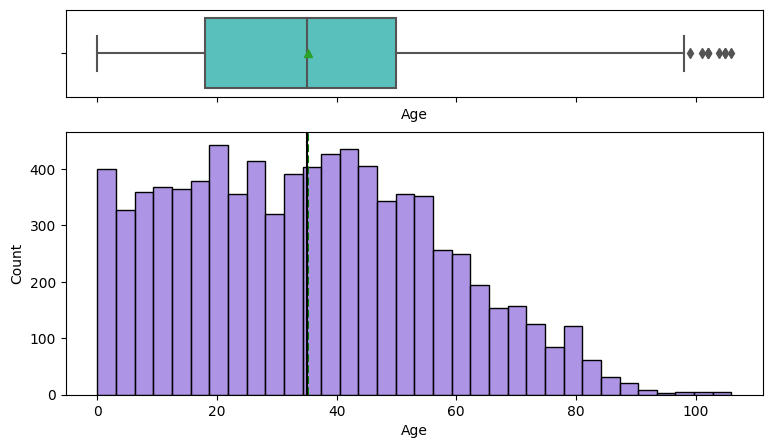

In [116]:
hist_boxplot(data = customer_data, feature = "Age")

The age distribution is slightly right skewed. This is because of there are people between the age of 90 and 106.
The median and mean are very close. They are approximately normally distributed

### Age Pyramid

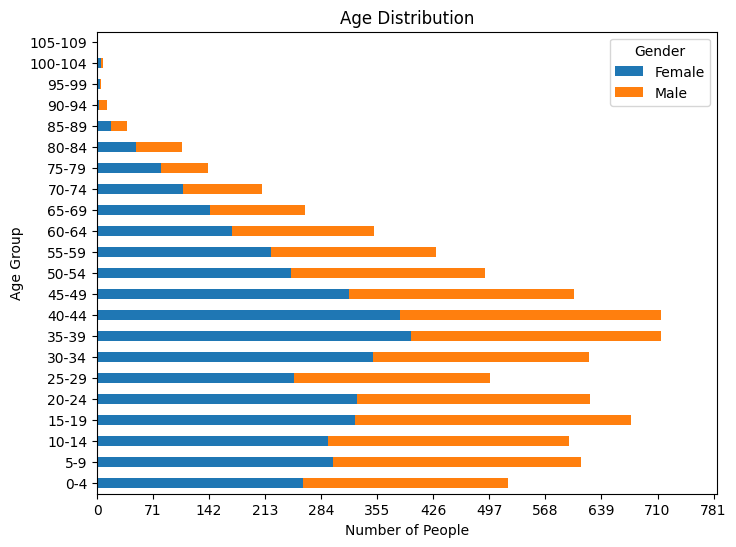

In [117]:
# calculate the min and max age values
min_age = int(customer_data['Age'].min())
max_age = int(customer_data['Age'].max() + 0.1)

# set the bin size and create the bins
bin_size = 5
bins = range(min_age, max_age + bin_size, bin_size)

# create the age groups
customer_data['age_group'] = pd.cut(customer_data['Age'], bins=bins, labels=[f'{i}-{i+bin_size-1}' for i in bins[:-1]])

# group by age group and gender and calculate the total count
age_groups = customer_data.groupby(['age_group', 'Gender']).size().unstack()

# plot the age pyramid
fig, ax = plt.subplots(figsize=(8, 6))

age_groups.plot(kind='barh', stacked=True, ax=ax)

# set the x-axis limits and ticks
max_count = age_groups.sum(axis=1).max()
ax.set_xlim([0, max_count * 1.1])
ax.set_xticks(range(0, int(max_count * 1.1), int(max_count * 0.1)))

# add labels and title
ax.set_xlabel('Number of People')
ax.set_ylabel('Age Group')
ax.set_title('Age Distribution')

plt.show()


The age group of 35-39 and 40 - 44 are the group with the highest population with values above 710 people. Suprisingly the groups of 0-5,5-9 and 10-14 are lower that the age range betwenn 35-49

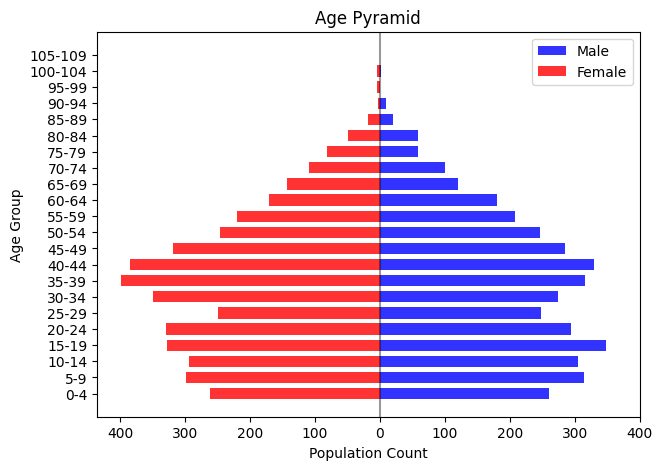

In [118]:
# calculate the min and max age values
min_age = int(customer_data['Age'].min())
max_age = int(customer_data['Age'].max() + 0.1)

# set the bin size and create the bins
bin_size = 5
bins = range(min_age, max_age + bin_size, bin_size)

# create the age groups
customer_data['age_group'] = pd.cut(customer_data['Age'], bins=bins, labels=[f'{i}-{i+bin_size-1}' for i in bins[:-1]])

# group by age group and gender and calculate the total count
age_groups = customer_data.groupby(['age_group', 'Gender']).size().unstack()

# separate male and female data frames
males = age_groups['Male'].sort_index(ascending=True)
females = age_groups['Female'].sort_index()

# plot the age pyramid
fig, ax = plt.subplots(figsize=(7, 5))

# plot male and female bars separately
ax.barh(males.index, males, height=-0.7, align='center', color='blue', alpha=0.8, left=0, label='Male')
ax.barh(females.index, -females, height=0.7, align='center', color='red', alpha=0.8, label='Female')

# set the x-axis limits and ticks
# max_count = max(abs(males).max(), abs(females).max())
# ax.set_xlim([-max_count * 1.1, max_count * 1.1])
# ax.set_xticks(range(-int(max_count * 1.1), int(max_count * 1.1) + 1, int(max_count * 0.1)))

# add vertical line at x=0
ax.axvline(x=0, linestyle='-', color='black', alpha=0.4)

# add labels and title
ax.set_xlabel('Population Count')
ax.set_ylabel('Age Group')
ax.set_title('Age Pyramid')

# add legend
ax.legend(loc='upper right')

# define custom x-axis tick values and labels
x_ticks = [-400, -300, -200, -100, 0, 100, 200, 300, 400]
x_tick_labels = ['400', '300', '200', '100', '0', '100', '200', '300', '400']
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels)

plt.show()



We have large portion of the age group between 0 and 59. This means that these groups are most active people that moves in and out of the town either students or working place. A train station will be ideal to make transportation fast and comfortable for people. What this means that majority of the people will benefit from the building of infrastracture.On futher examination of the pyramid, it can be observed that the population structure shows a slightly lower number of young people (aged 0-4) compared to middle-aged people. This could suggest a low birth rate in the population. 

### Age and Unemployement

The data shows a steady increase in the unemployment rate from age 20 to 40, with the highest rate of 12.23% observed in the age group 40-44. After age 40, the unemployment rate starts to decline slightly, but still remains relatively high for older age groups.

In [119]:

# filtering census data to include only age data
data_age = customer_data[['Age']]

# computing the number of children aged zero
children_num = len(data_age [data_age ['Age'] == 0])

# computing the number of potential women of childbearing age
numwomen = len(data_age [(data_age ['Age'] >= 20) & (data_age ['Age'] <= 40)])

# computing the birth rate per 100,000
birth_rate = (children_num / numwomen) * 100000

print("The birth rate per 100,000 is: {:.2f}".format(birth_rate))


The birth rate per 100,000 is: 3391.14


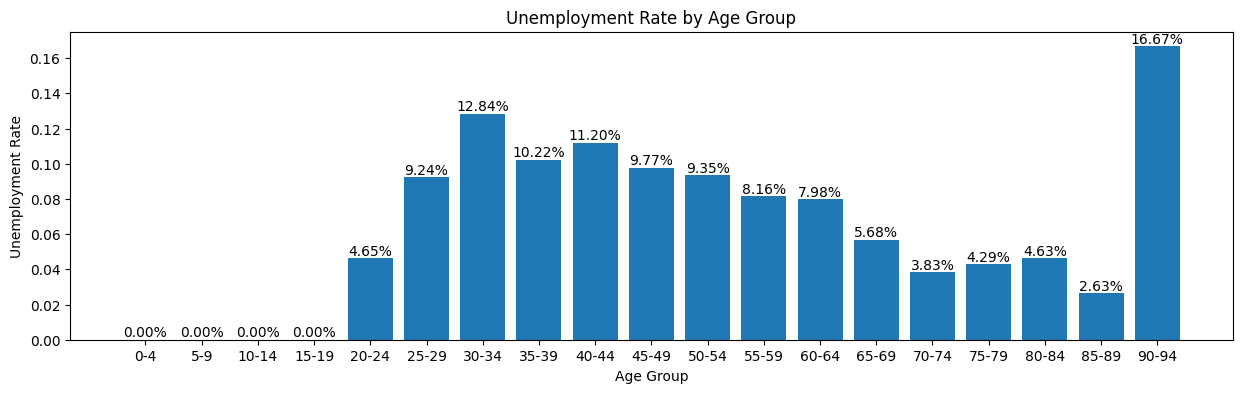

In [120]:
# Create age groups
bins = range(0, 100, 5)
customer_data['age_group'] = pd.cut(customer_data['Age'], bins=bins, labels=[f'{i}-{i+4}' for i in bins[:-1]])

# Calculate unemployment rate by age group
unemployment_rate = customer_data.groupby("age_group")["Occupation"].apply(lambda x: (x == "Unemployed").sum() / len(x))

# Create plot
fig, ax = plt.subplots(figsize=(15, 4))
ax.bar(unemployment_rate.index, unemployment_rate)

# Set axis labels and title
ax.set_xlabel("Age Group")
ax.set_ylabel("Unemployment Rate")
ax.set_title("Unemployment Rate by Age Group")

# Add percentage values to the bars
for i, v in enumerate(unemployment_rate):
    ax.text(i, v, f"{v*100:.2f}%", ha='center', va='bottom')

# Show plot
plt.show()


The plot showed the unemeployment rate for different age groups. Unemployment rate rose from 0.00% in the age group of 20-24 untill it got 12.84% for the age group of 30-34. Although it declined to 10.22% for the age group of 35-39, it went up again for the age group of 40 - 44 to 11.20% before it starts to declining. It was highest in the age group of 90-94 which understandbly is the peak age of retired people.The age range of 20 to 59 are where we have the highest number of working class people. Unemployment in these groups are above the UK acceptable range. This is cited in the report.

### Using univariate on our categorical plot

In [122]:
# function to create labeled barplots

def barplot_labbelled(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Relationship to the Head of the House

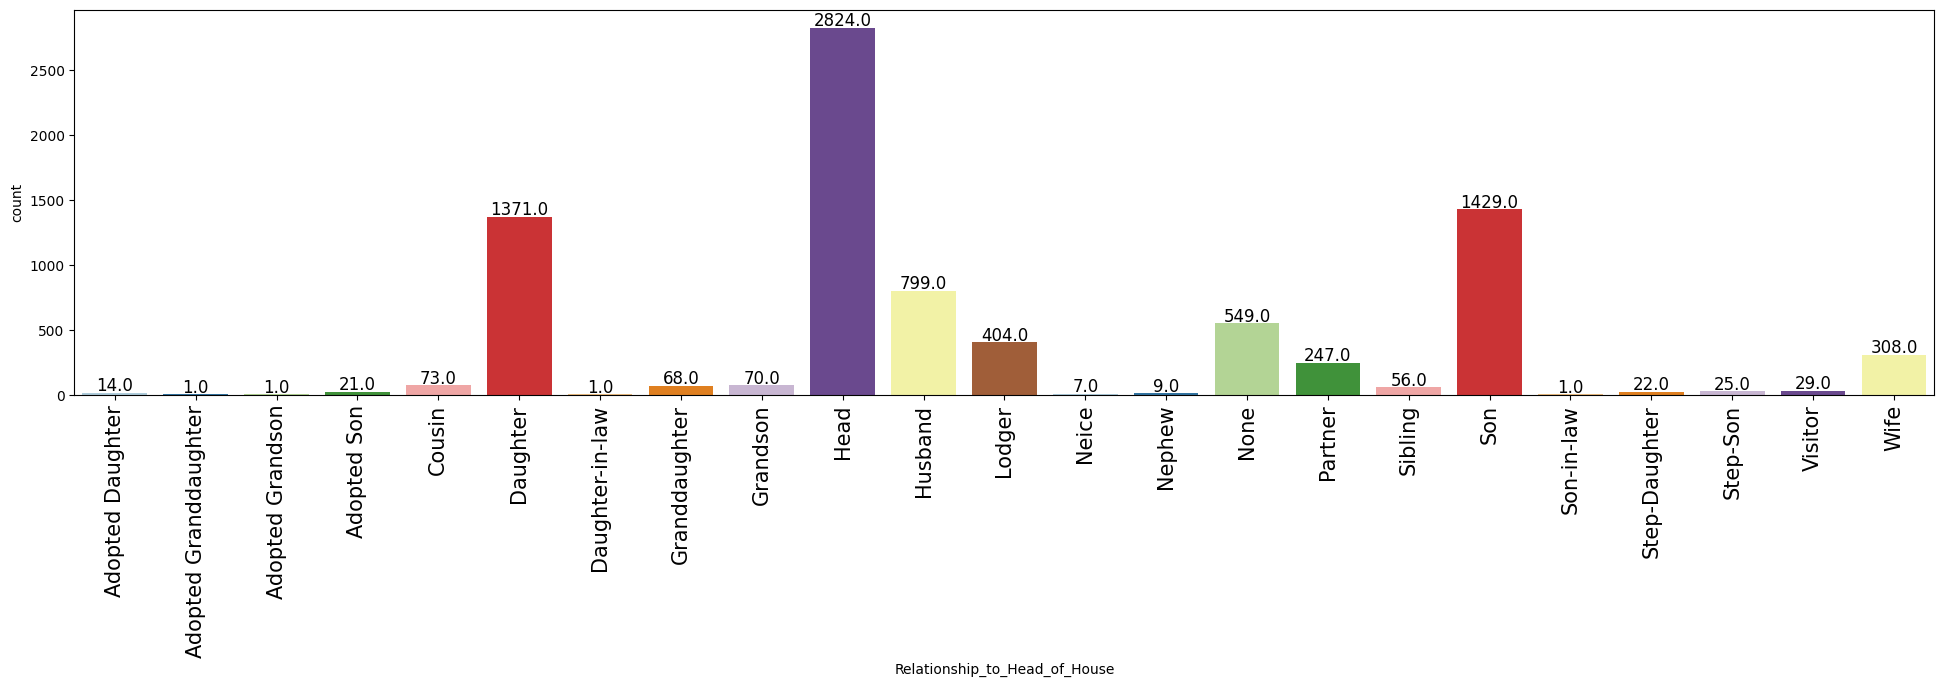

In [123]:
barplot_labbelled(data = customer_data, feature ='Relationship_to_Head_of_House')






About 2824 are head of house which can be either male,female or transgender. Howeever,about 1371 daughter are related to the head of the house while 1429, 799 and 308 for Son, Husbands and wives respectively are related to the head of the house. We also have lodgers and visitors that are related with the head of the house with values of 404.0 and 29.0 respectively. This information will come in handy in also determining the likely commuters that may likely use train or not

### Marital Status

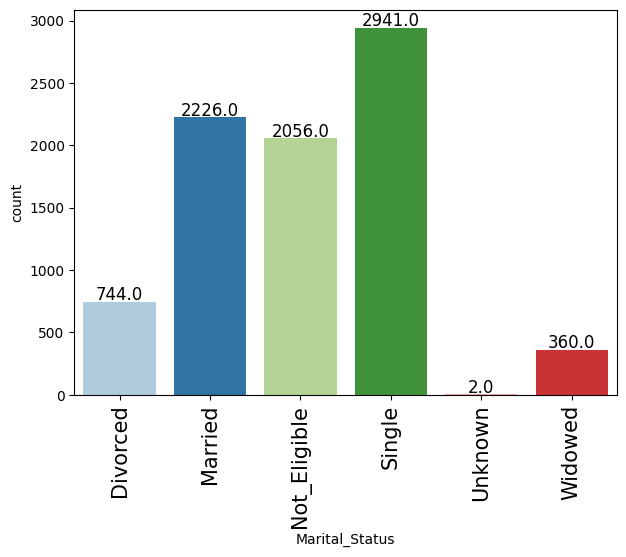

In [124]:
# plotting univariate for marital status
barplot_labbelled(data = customer_data, feature ='Marital_Status')

Going through the marital status showed that greater number of people (2941) are single, the married are 2226,Not_Eligible which are people that are not upto 18 years are 2056 in number, the Divorced are 744 in number while widowed are just 360. We have 2 people which we did not know the marital status. 

### Divorce and mariage rates

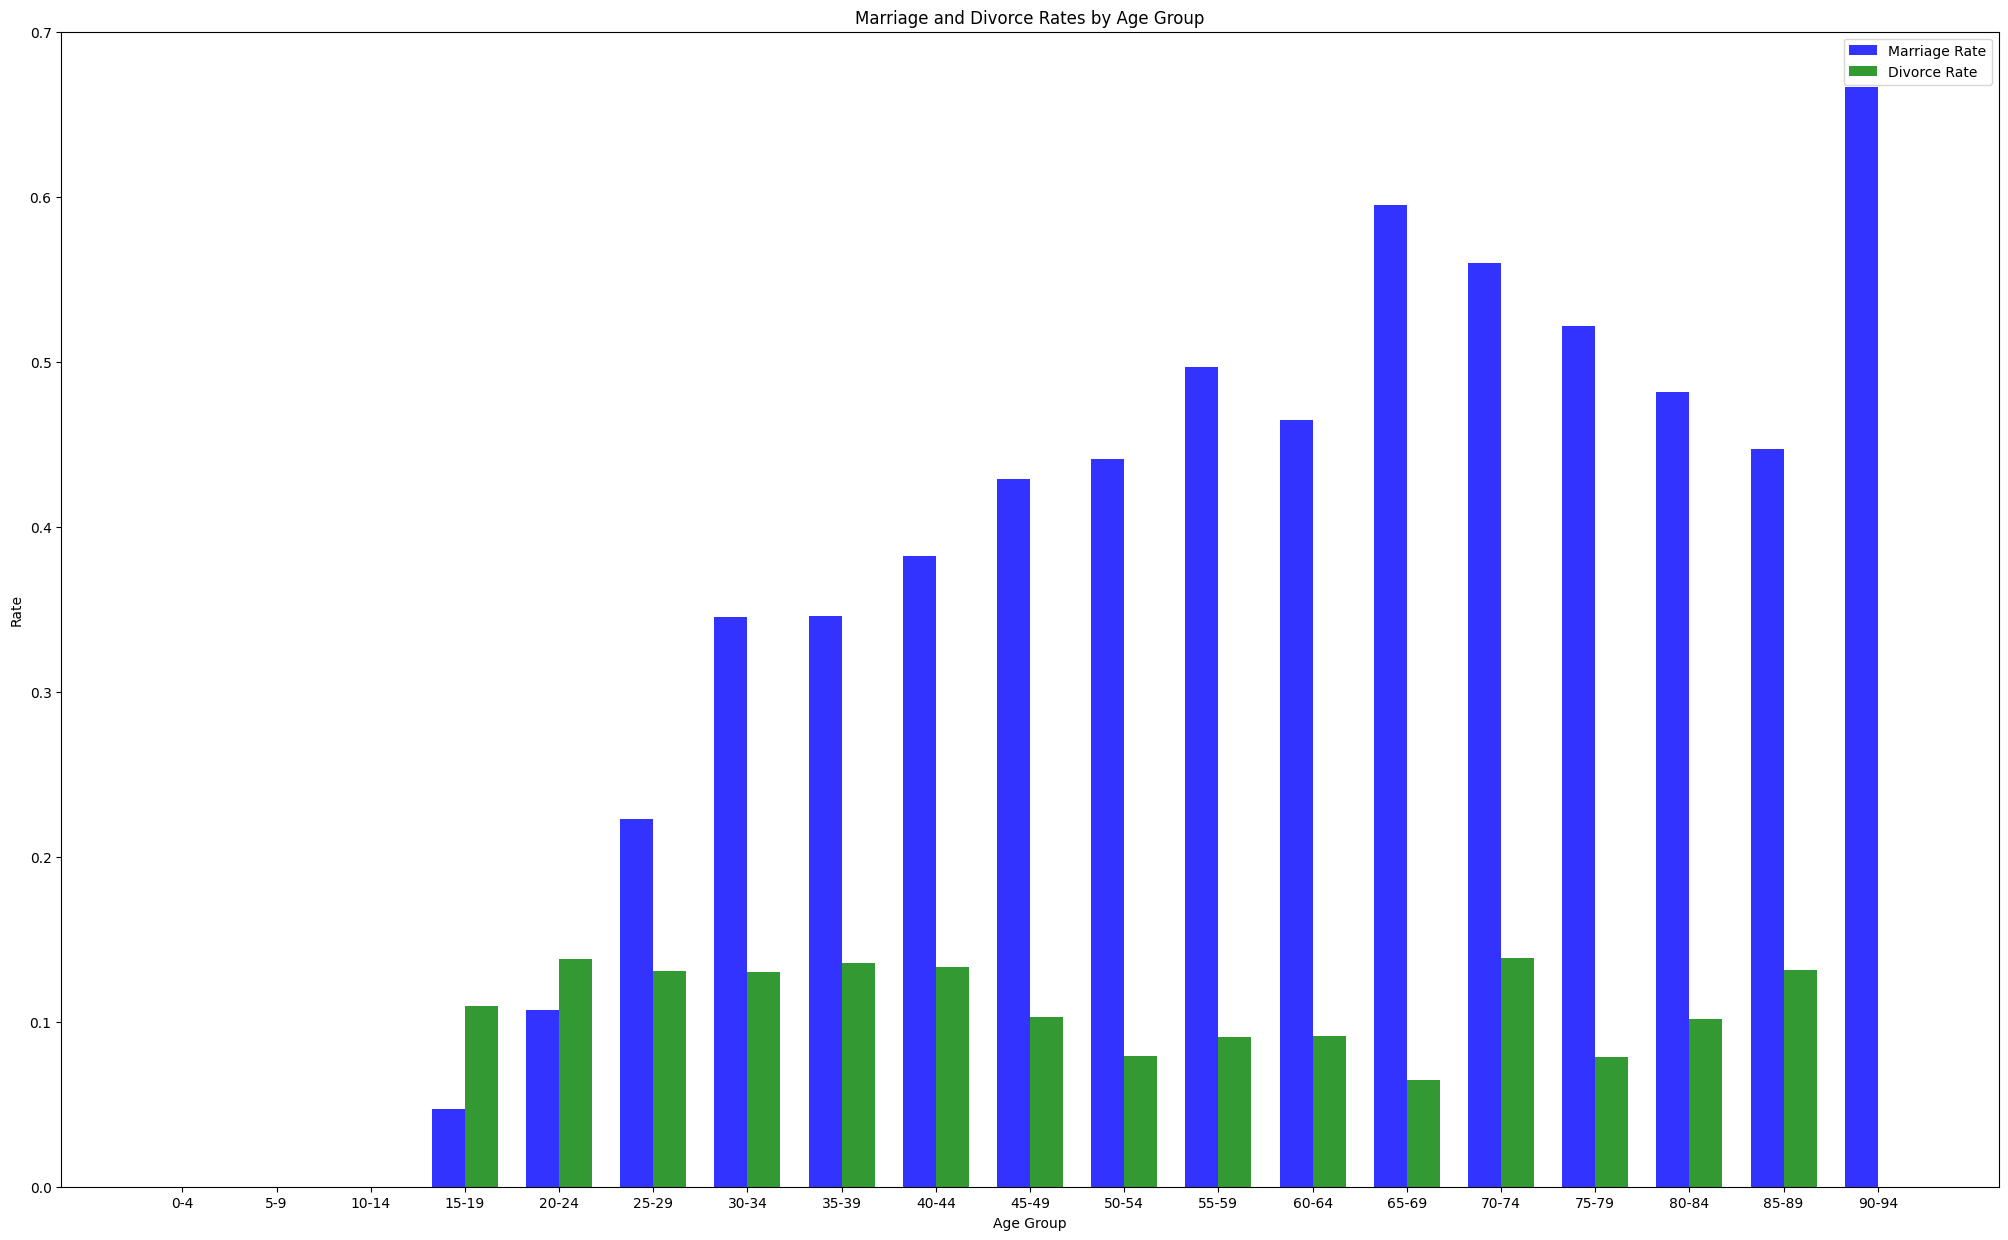

In [125]:
# Calculate marriage rate by age group
marriage_rate = customer_data.groupby("age_group")["Marital_Status"].apply(lambda x: (x == "Married").sum() / len(x))

# Calculate divorce rate by age group
divorce_rate = customer_data.groupby("age_group")["Marital_Status"].apply(lambda x: (x == "Divorced").sum() / len(x))

# Create plot
fig, ax = plt.subplots(figsize=(25, 15))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(marriage_rate.index))

rects1 = ax.bar(index, marriage_rate, bar_width,
                alpha=opacity, color='b',
                label='Marriage Rate')

rects2 = ax.bar(index + bar_width, divorce_rate, bar_width,
                alpha=opacity, color='g',
                label='Divorce Rate')

# Set axis labels and title
ax.set_xlabel("Age Group")
ax.set_ylabel("Rate")
ax.set_title("Marriage and Divorce Rates by Age Group")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(marriage_rate.index)

# Add legend
ax.legend()

# Show plot
plt.show()

The plot showed that maariage rate is higher than the Divorce rate. This is a pointer the community values marriage. It also a pointer that there is possibility of continuous increase in the population in the nearest future based on the data available to me. However, the Age Pyramid plot that showed the population of children below the age of 10 to be lesser in Number when compared with age range of 35 to 44 is still a concerned.  

### Religion Distribution

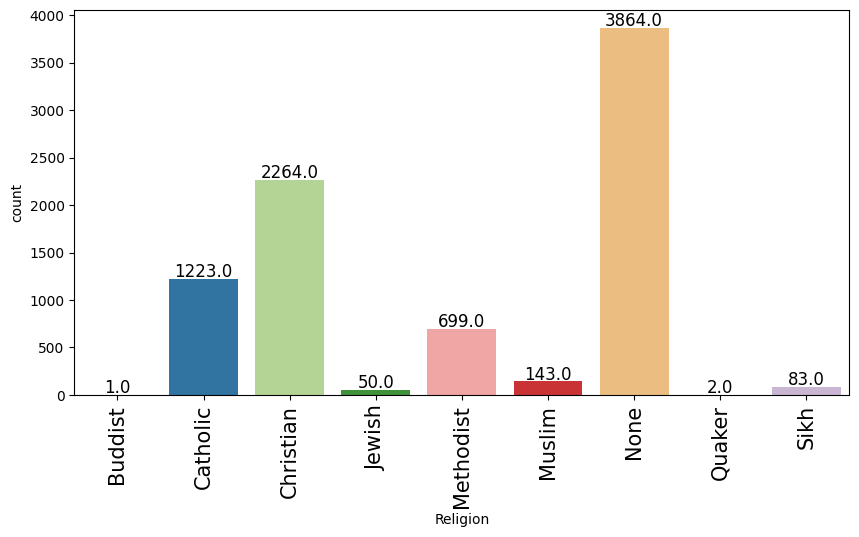

In [126]:
# plotting univariate for Religion
barplot_labbelled(data = customer_data, feature ='Religion')

A total of 3864 people have no religion while the Christians group are made up of 2264. This simply showed that the town is not too religious and building a religious center is not an immediate need that the government should consider for now 

### Infrimity Distribution  

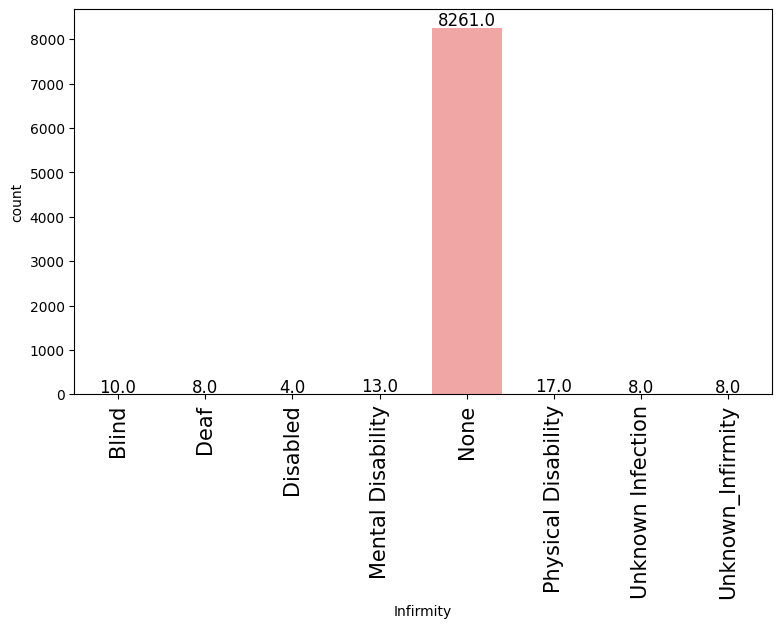

In [127]:
# ploting for Infirmit
barplot_labbelled(data = customer_data, feature ='Infirmity')

We have a total of 8329. 8261 of this number are with no Infirmity.People that has infection but are unable to identify the name of the infection are 8 in number while we have 8 people which the information provided in the dataset was not able to state if they are heve infirmity or not. This simply means that building of Emergency medical unit is not what is required at this time. People with no Infirmity are above 98%

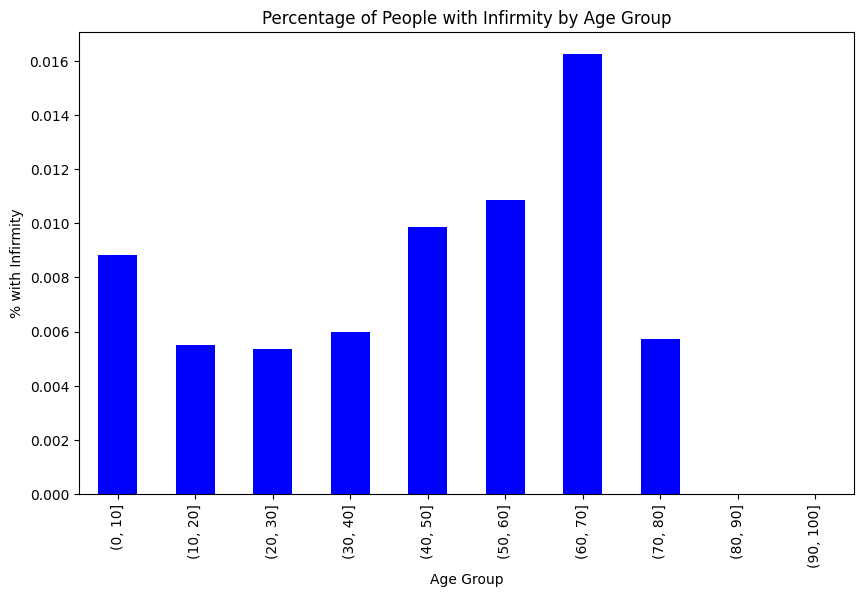

In [128]:
# Convert values to "None" and "Yes"
customer_data['Infirmity'] = customer_data['Infirmity'].apply(lambda x: "None" if x == "None" else "Yes")

# Create age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Group data by age bins and infirmity status
age_groups = customer_data.groupby([pd.cut(customer_data['Age'], age_bins), 'Infirmity']).size().unstack()

# Calculate percentage of "Yes" in each age group
age_groups['Yes_percentage'] = age_groups['Yes'] / age_groups.sum(axis=1)

# Plot bar chart
ax = age_groups['Yes_percentage'].plot(kind='bar', figsize=(10, 6), color='blue')
ax.set_xlabel('Age Group')
ax.set_ylabel('% with Infirmity')
ax.set_title('Percentage of People with Infirmity by Age Group')
plt.show()

We have more people with infirmity in the age group of 60 - 70 years

In [129]:
age_groups

Infirmity  None  Yes  Yes_percentage
Age                                 
(0, 10]    1124   10        0.008818
(10, 20]   1267    7        0.005495
(20, 30]   1116    6        0.005348
(30, 40]   1329    8        0.005984
(40, 50]   1305   13        0.009863
(50, 60]    911   10        0.010858
(60, 70]    605   10        0.016260
(70, 80]    347    2        0.005731
(80, 90]    146    0        0.000000
(90, 100]    17    0        0.000000

### Occupation

In [130]:
print(customer_data['Occupation'].value_counts())

Student                                                        1669
Retired                                                         656
University Student                                              559
Unemployed                                                      513
Child                                                           500
Secretary, company                                               16
Set designer                                                     15
TEFL teacher                                                     14
Bookseller                                                       14
Brewing technologist                                             14
PhD Student                                                      14
Social research officer, government                              14
Engineer, manufacturing                                          14
Fast food restaurant manager                                     13
Public house manager                            

This gives exactly what is going on in the occupation column. The occupation with the highest number of people are students with the population of 1669. This is followed distantly by Retired, University Student,Unemployed and Child with the population of 656,559,513 and 500 respectively.

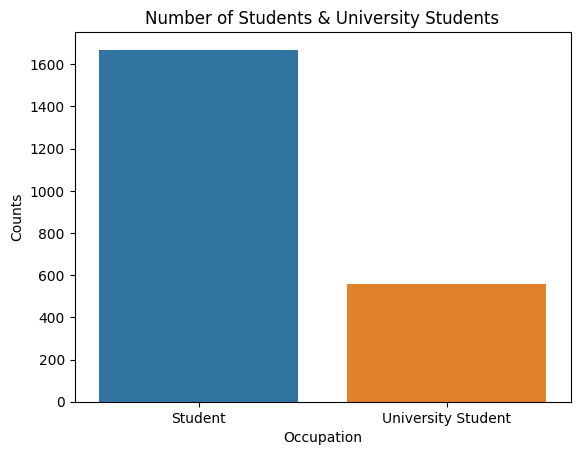

In [131]:
# plot of students and University students

# Visualizing the number of students and University students to see how this can help us make a decison.

# Filter dataframe to only include the two features of interest
df_filtered = customer_data.loc[customer_data['Occupation'].isin(['Student', 'University Student'])]

# Create countplot
sns.countplot(x='Occupation', data=df_filtered)

# Set the labels and title of the chart
plt.xlabel('Occupation')
plt.ylabel('Counts')
plt.title('Number of Students & University Students')

# Show the chart
plt.show()

We have a total of 1669 with student as their occupation and 559 with University student as their occupation. This makes it 2228 of people that commutes daily within and outside the town for their educational needs.This number is not enough to warant building a university as not all the people in this group will drop from their current school and move to the new school. Again from the details surrrounding the town, it means that the nearby cities already have universities. These little number cannot sustain a university except if the government wants to plan the building of the university with the population outside the town. In that case we will need to look at anoter data that may help us make inform decision. It will not be economically viable to build a University in the town for now